<a href="https://colab.research.google.com/github/tejal-0810/MCA_project/blob/main/Rainfall_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('weatherAUS.csv')

In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10812,1/18/2014,CoffsHarbour,17.6,28.3,0.0,8.0,NaN,NE,43.0,N,...,52.0,53.0,1015.1,1012.5,0.0,0.0,26.5,27.5,No,No
10813,1/19/2014,CoffsHarbour,18.8,28.1,0.0,8.0,NaN,NNE,43.0,N,...,57.0,57.0,1009.9,1006.4,1.0,1.0,25.9,27.1,No,No
10814,1/20/2014,CoffsHarbour,18.2,28.2,0.0,7.2,NaN,NE,46.0,S,...,65.0,63.0,1009.4,1006.5,1.0,3.0,25.1,27.7,No,No
10815,1/21/2014,CoffsHarbour,21.3,28.5,0.0,6.2,11.2,NE,52.0,NE,...,78.0,73.0,1007.9,1004.2,2.0,2.0,25.9,27.6,No,Yes


In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
10812,1/18/2014,CoffsHarbour,17.6,28.3,0.0,8.0,NaN,NE,43.0,N,...,52.0,53.0,1015.1,1012.5,0.0,0.0,26.5,27.5,No,No
10813,1/19/2014,CoffsHarbour,18.8,28.1,0.0,8.0,NaN,NNE,43.0,N,...,57.0,57.0,1009.9,1006.4,1.0,1.0,25.9,27.1,No,No
10814,1/20/2014,CoffsHarbour,18.2,28.2,0.0,7.2,NaN,NE,46.0,S,...,65.0,63.0,1009.4,1006.5,1.0,3.0,25.1,27.7,No,No
10815,1/21/2014,CoffsHarbour,21.3,28.5,0.0,6.2,11.2,NE,52.0,NE,...,78.0,73.0,1007.9,1004.2,2.0,2.0,25.9,27.6,No,Yes
10816,1/22/2014,CoffsHarbour,24.2,28.2,1.6,7.6,NaN,S,50.0,SSW,...,81.0,80.0,1012.9,1015.1,8.0,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10817 entries, 0 to 10816
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           10817 non-null  object 
 1   Location       10817 non-null  object 
 2   MinTemp        10763 non-null  float64
 3   MaxTemp        10772 non-null  float64
 4   Rainfall       10682 non-null  float64
 5   Evaporation    4363 non-null   float64
 6   Sunshine       2006 non-null   float64
 7   WindGustDir    10630 non-null  object 
 8   WindGustSpeed  10630 non-null  float64
 9   WindDir9am     9792 non-null   object 
 10  WindDir3pm     10663 non-null  object 
 11  WindSpeed9am   10737 non-null  float64
 12  WindSpeed3pm   10741 non-null  float64
 13  Humidity9am    10623 non-null  float64
 14  Humidity3pm    10617 non-null  float64
 15  Pressure9am    10606 non-null  float64
 16  Pressure3pm    10602 non-null  float64
 17  Cloud9am       5662 non-null   float64
 18  Cloud3

In [ ]:
df.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [ ]:
numerical_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
discrete_feature=[feature for feature in numerical_feature if len(df[feature].unique())<25]
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in df.columns if feature not in numerical_feature]
print("Numerical Features Count {}".format(len(numerical_feature)))
print("Discrete Feature Count {}".format(len(discrete_feature)))
print("Continuous Feature Count {}".format(len(continuous_feature)))
print("CategorialFeatures Count {}".format(len(categorical_feature)))

Numerical Features Count 16
Discrete Feature Count 2
Continuous Feature Count 14
CategorialFeatures Count 7


In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df['WindGustDir'].dtypes

dtype('O')

In [ ]:
df['WindGustSpeed'].dtypes

dtype('float64')

In [ ]:
[feature for feature in df.columns if df[feature].dtypes != 'O']

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
[feature for feature in numerical_feature if len(df[feature].unique())<25]

['Cloud9am', 'Cloud3pm']

In [ ]:
[feature for feature in numerical_feature if feature not in discrete_feature]

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
[feature for feature in df.columns if feature not in numerical_feature]

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
df.isnull().sum()

Date                0
Location            0
MinTemp            54
MaxTemp            45
Rainfall          135
Evaporation      6454
Sunshine         8811
WindGustDir       187
WindGustSpeed     187
WindDir9am       1025
WindDir3pm        154
WindSpeed9am       80
WindSpeed3pm       76
Humidity9am       194
Humidity3pm       200
Pressure9am       211
Pressure3pm       215
Cloud9am         5155
Cloud3pm         4954
Temp9am            61
Temp3pm            64
RainToday         136
RainTomorrow      136
dtype: int64

In [ ]:
df.isnull().sum()*100/len(df)

Date              0.000000
Location          0.000000
MinTemp           0.499214
MaxTemp           0.416012
Rainfall          1.248035
Evaporation      59.665342
Sunshine         81.455117
WindGustDir       1.728760
WindGustSpeed     1.728760
WindDir9am        9.475825
WindDir3pm        1.423685
WindSpeed9am      0.739577
WindSpeed3pm      0.702598
Humidity9am       1.793473
Humidity3pm       1.848941
Pressure9am       1.950633
Pressure3pm       1.987612
Cloud9am         47.656467
Cloud3pm         45.798280
Temp9am           0.563927
Temp3pm           0.591661
RainToday         1.257280
RainTomorrow      1.257280
dtype: float64

In [ ]:
numerical_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
categorical_feature

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
def randomsampleimputation(df,variable):
    df[variable]=df[variable]
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum())
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable]=random_sample

In [ ]:
randomsampleimputation(df, 'Cloud9am')
randomsampleimputation(df, 'Cloud3pm')
randomsampleimputation(df, 'Evaporation')
randomsampleimputation(df, 'Sunshine')

ValueError: ignored

In [ ]:
df['Cloud9am'].isnull().sum(0)

0

In [ ]:
df['Cloud9am'].sample(df['Cloud9am'].isnull().sum(),random_state=0)

Series([], Name: Cloud9am, dtype: float64)

In [ ]:
#Continuous features
for features in continuous_feature:
    if(df[features].isnull().sum() > 0):
        df[features]= df[features].fillna(df[features].median())

In [ ]:
df.isnull().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir       187
WindGustSpeed       0
WindDir9am       1025
WindDir3pm        154
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday         136
RainTomorrow      136
dtype: int64

In [ ]:
#categorical variable

In [ ]:
categorical_feature

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [ ]:
df[['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,W,W,WNW,No,No
1,12/2/2008,Albury,WNW,NNW,WSW,No,No
2,12/3/2008,Albury,WSW,W,WSW,No,No
3,12/4/2008,Albury,NE,SE,E,No,No
4,12/5/2008,Albury,W,ENE,NW,No,No
...,...,...,...,...,...,...,...
10812,1/18/2014,CoffsHarbour,NE,N,ENE,No,No
10813,1/19/2014,CoffsHarbour,NNE,N,NE,No,No
10814,1/20/2014,CoffsHarbour,NE,S,NE,No,No
10815,1/21/2014,CoffsHarbour,NE,NE,NE,No,Yes


In [ ]:
df['Location'].value_counts()

Albury           3040
BadgerysCreek    3009
Cobar            3009
CoffsHarbour     1759
Name: Location, dtype: int64

In [ ]:
df['Location'].unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour'], dtype=object)

In [ ]:
len(df['Location'].unique())

4

In [ ]:
df['RainTomorrow'].value_counts()

No     8562
Yes    2119
Name: RainTomorrow, dtype: int64

In [ ]:
# Feature Engineering of Date column to decrease high cardinality:

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,4.4,8.9,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,1.0,16.9,21.8,No,No
1,12/2/2008,Albury,7.4,25.1,0.0,4.4,8.9,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,6.0,1.0,17.2,24.3,No,No
2,12/3/2008,Albury,12.9,25.7,0.0,4.4,8.9,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,12/4/2008,Albury,9.2,28.0,0.0,4.4,8.9,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,2.0,3.0,18.1,26.5,No,No
4,12/5/2008,Albury,17.5,32.3,1.0,4.4,8.9,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df['RainTomorrow'] = pd.get_dummies(df['RainTomorrow'],drop_first=True)
df['RainToday'] = pd.get_dummies(df['RainToday'],drop_first=True)

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,13.4,22.9,0.6,4.4,8.9,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,1.0,16.9,21.8,0,0
1,12/2/2008,Albury,7.4,25.1,0.0,4.4,8.9,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,6.0,1.0,17.2,24.3,0,0
2,12/3/2008,Albury,12.9,25.7,0.0,4.4,8.9,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,12/4/2008,Albury,9.2,28.0,0.0,4.4,8.9,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,2.0,3.0,18.1,26.5,0,0
4,12/5/2008,Albury,17.5,32.3,1.0,4.4,8.9,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [ ]:
df[['Date','Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,12/1/2008,Albury,W,W,WNW,0,0
1,12/2/2008,Albury,WNW,NNW,WSW,0,0
2,12/3/2008,Albury,WSW,W,WSW,0,0
3,12/4/2008,Albury,NE,SE,E,0,0
4,12/5/2008,Albury,W,ENE,NW,0,0
...,...,...,...,...,...,...,...
10812,1/18/2014,CoffsHarbour,NE,N,ENE,0,0
10813,1/19/2014,CoffsHarbour,NNE,N,NE,0,0
10814,1/20/2014,CoffsHarbour,NE,S,NE,0,0
10815,1/21/2014,CoffsHarbour,NE,NE,NE,0,1


In [ ]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

df['Location'] = labelencoder.fit_transform(df['Location'])
df['WindGustDir'] = labelencoder.fit_transform(df['WindGustDir'])
df['WindDir9am'] = labelencoder.fit_transform(df['WindDir9am'])
df['WindDir3pm'] = labelencoder.fit_transform(df['WindDir3pm'])

In [ ]:
df[['Date','Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']]

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,12/1/2008,0,13,13,14,0,0
1,12/2/2008,0,14,6,15,0,0
2,12/3/2008,0,15,13,15,0,0
3,12/4/2008,0,4,9,0,0,0
4,12/5/2008,0,13,1,7,0,0
...,...,...,...,...,...,...,...
10812,1/18/2014,3,4,3,1,0,0
10813,1/19/2014,3,5,3,4,0,0
10814,1/20/2014,3,4,8,4,0,0
10815,1/21/2014,3,4,4,4,0,1


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# change
# df['Date'] = pd.to_datetime(df['Date'], format = "%Y-%m-%dT", errors = "coerce")
# df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,0,13.4,22.9,0.6,4.4,8.9,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,1.0,16.9,21.8,0,0
1,2008-12-02,0,7.4,25.1,0.0,4.4,8.9,14,44.0,6,...,44.0,25.0,1010.6,1007.8,6.0,1.0,17.2,24.3,0,0
2,2008-12-03,0,12.9,25.7,0.0,4.4,8.9,15,46.0,13,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,2008-12-04,0,9.2,28.0,0.0,4.4,8.9,4,24.0,9,...,45.0,16.0,1017.6,1012.8,2.0,3.0,18.1,26.5,0,0
4,2008-12-05,0,17.5,32.3,1.0,4.4,8.9,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10812,2014-01-18,3,17.6,28.3,0.0,8.0,8.9,4,43.0,3,...,52.0,53.0,1015.1,1012.5,0.0,0.0,26.5,27.5,0,0
10813,2014-01-19,3,18.8,28.1,0.0,8.0,8.9,5,43.0,3,...,57.0,57.0,1009.9,1006.4,1.0,1.0,25.9,27.1,0,0
10814,2014-01-20,3,18.2,28.2,0.0,7.2,8.9,4,46.0,8,...,65.0,63.0,1009.4,1006.5,1.0,3.0,25.1,27.7,0,0
10815,2014-01-21,3,21.3,28.5,0.0,6.2,11.2,4,52.0,4,...,78.0,73.0,1007.9,1004.2,2.0,2.0,25.9,27.6,0,1


In [ ]:
# change
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-01,0,13.4,22.9,0.6,4.4,8.9,13,44.0,13,...,1007.1,8.0,1.0,16.9,21.8,0,0,2008,12,1
1,2008-12-02,0,7.4,25.1,0.0,4.4,8.9,14,44.0,6,...,1007.8,6.0,1.0,17.2,24.3,0,0,2008,12,2
2,2008-12-03,0,12.9,25.7,0.0,4.4,8.9,15,46.0,13,...,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3
3,2008-12-04,0,9.2,28.0,0.0,4.4,8.9,4,24.0,9,...,1012.8,2.0,3.0,18.1,26.5,0,0,2008,12,4
4,2008-12-05,0,17.5,32.3,1.0,4.4,8.9,13,41.0,1,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10812,2014-01-18,3,17.6,28.3,0.0,8.0,8.9,4,43.0,3,...,1012.5,0.0,0.0,26.5,27.5,0,0,2014,1,18
10813,2014-01-19,3,18.8,28.1,0.0,8.0,8.9,5,43.0,3,...,1006.4,1.0,1.0,25.9,27.1,0,0,2014,1,19
10814,2014-01-20,3,18.2,28.2,0.0,7.2,8.9,4,46.0,8,...,1006.5,1.0,3.0,25.1,27.7,0,0,2014,1,20
10815,2014-01-21,3,21.3,28.5,0.0,6.2,11.2,4,52.0,4,...,1004.2,2.0,2.0,25.9,27.6,0,1,2014,1,21


In [ ]:
df.drop('Date', axis = 1, inplace = True)
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,13.4,22.9,0.6,4.4,8.9,13,44.0,13,14,...,1007.1,8.0,1.0,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.1,0.0,4.4,8.9,14,44.0,6,15,...,1007.8,6.0,1.0,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.7,0.0,4.4,8.9,15,46.0,13,15,...,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.0,0.0,4.4,8.9,4,24.0,9,0,...,1012.8,2.0,3.0,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.3,1.0,4.4,8.9,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


In [ ]:
# df['Date_month'] = df['Date'].dt.month

In [ ]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,0,13.4,22.9,0.6,4.4,8.9,13,44.0,13,14,...,1007.1,8.0,1.0,16.9,21.8,0,0,2008,12,1
1,0,7.4,25.1,0.0,4.4,8.9,14,44.0,6,15,...,1007.8,6.0,1.0,17.2,24.3,0,0,2008,12,2
2,0,12.9,25.7,0.0,4.4,8.9,15,46.0,13,15,...,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3
3,0,9.2,28.0,0.0,4.4,8.9,4,24.0,9,0,...,1012.8,2.0,3.0,18.1,26.5,0,0,2008,12,4
4,0,17.5,32.3,1.0,4.4,8.9,13,41.0,1,7,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


In [ ]:
# df['Date_day'] = df['Date'].dt.day
# df['Date_year'] = df['Date'].dt.year

In [ ]:
Exploratory Data Analysis (EDA)

In [ ]:
# Plot Heat map

In [ ]:
# Correlation
# Correlation is a statistical technique that can show whether and how strongly pairs of variables are related

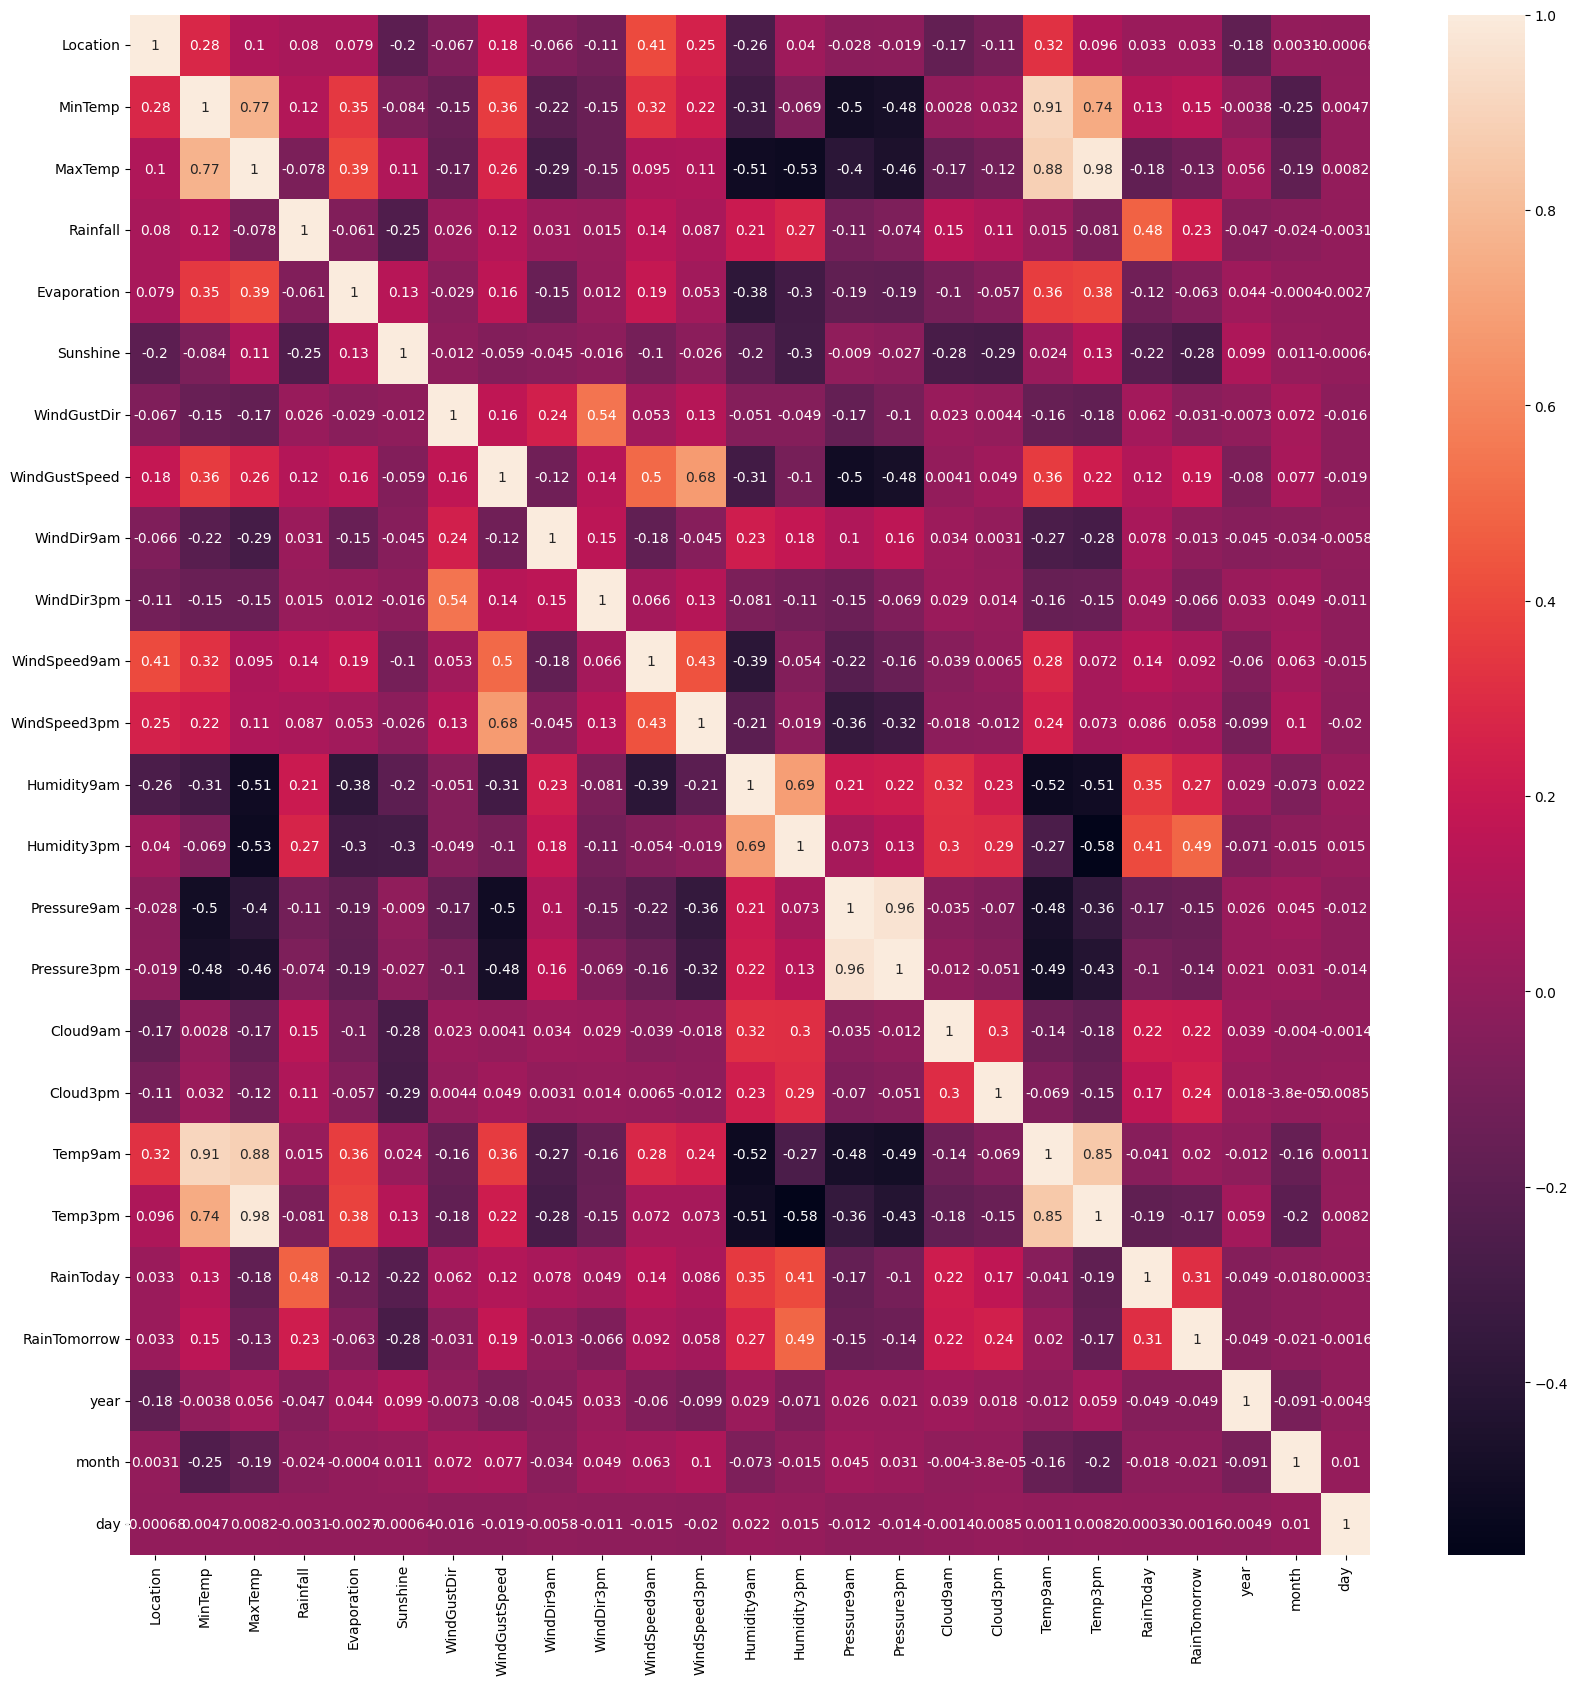

In [ ]:
corrmat = df.corr()
plt.figure(figsize=(20,20))
g=sns.heatmap(corrmat,annot=True)

In [ ]:
# Plot Boxplot
#For Loop is used to plot a boxplot for all the continuous feature to see the outliners

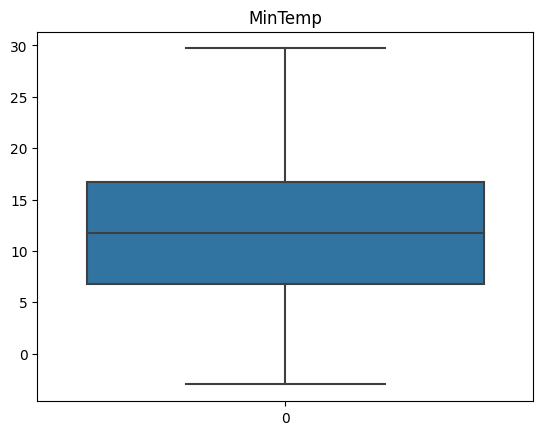

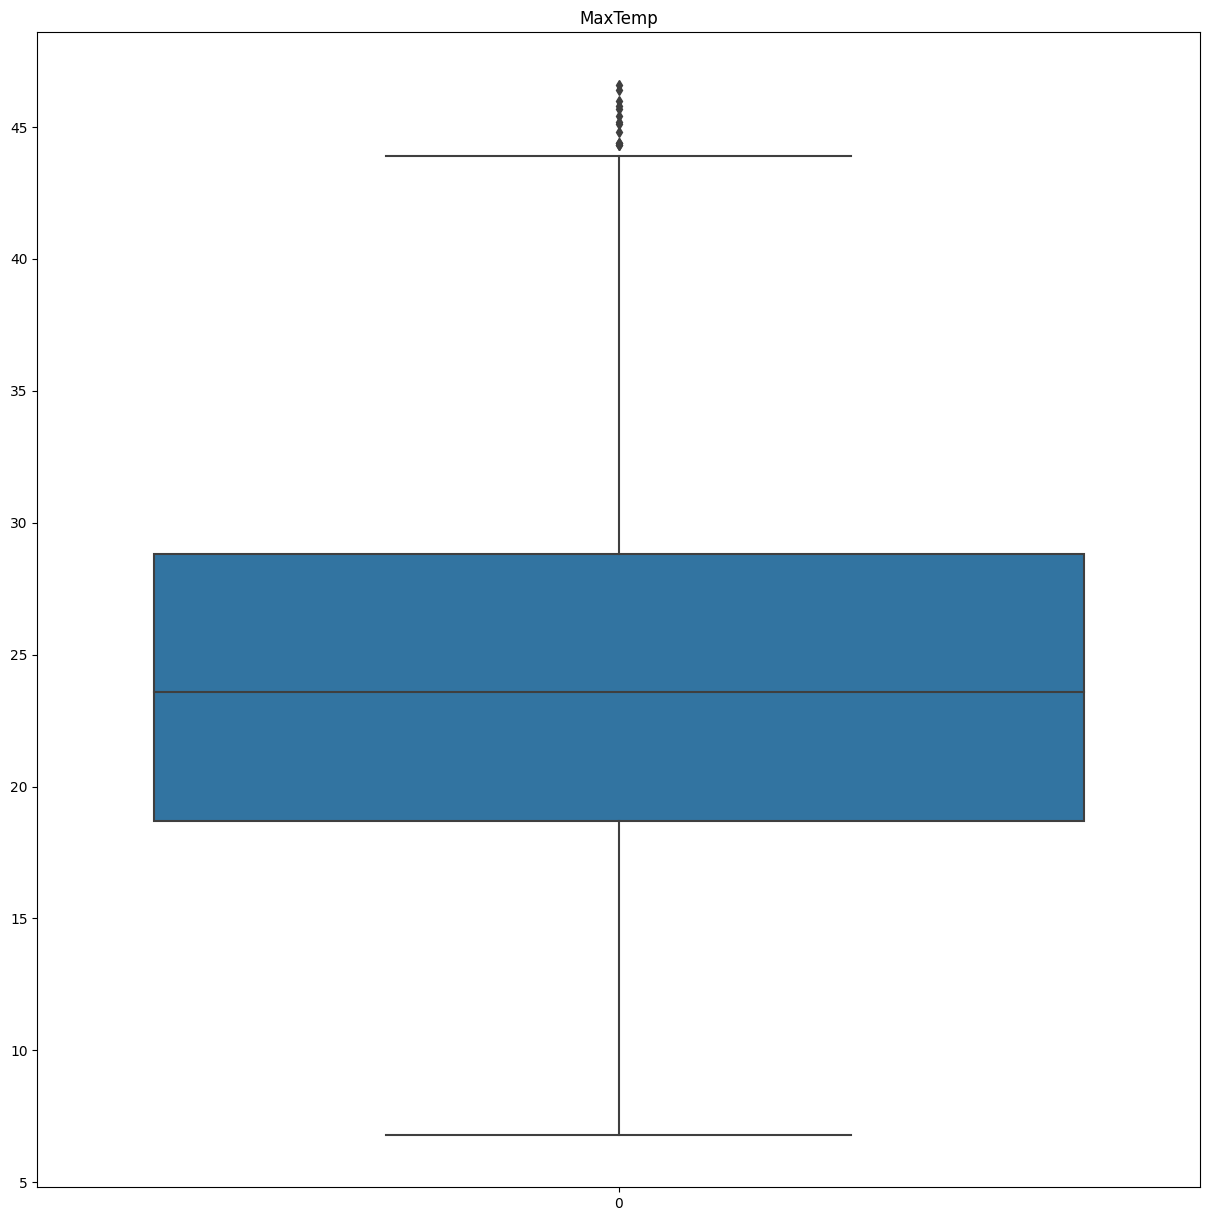

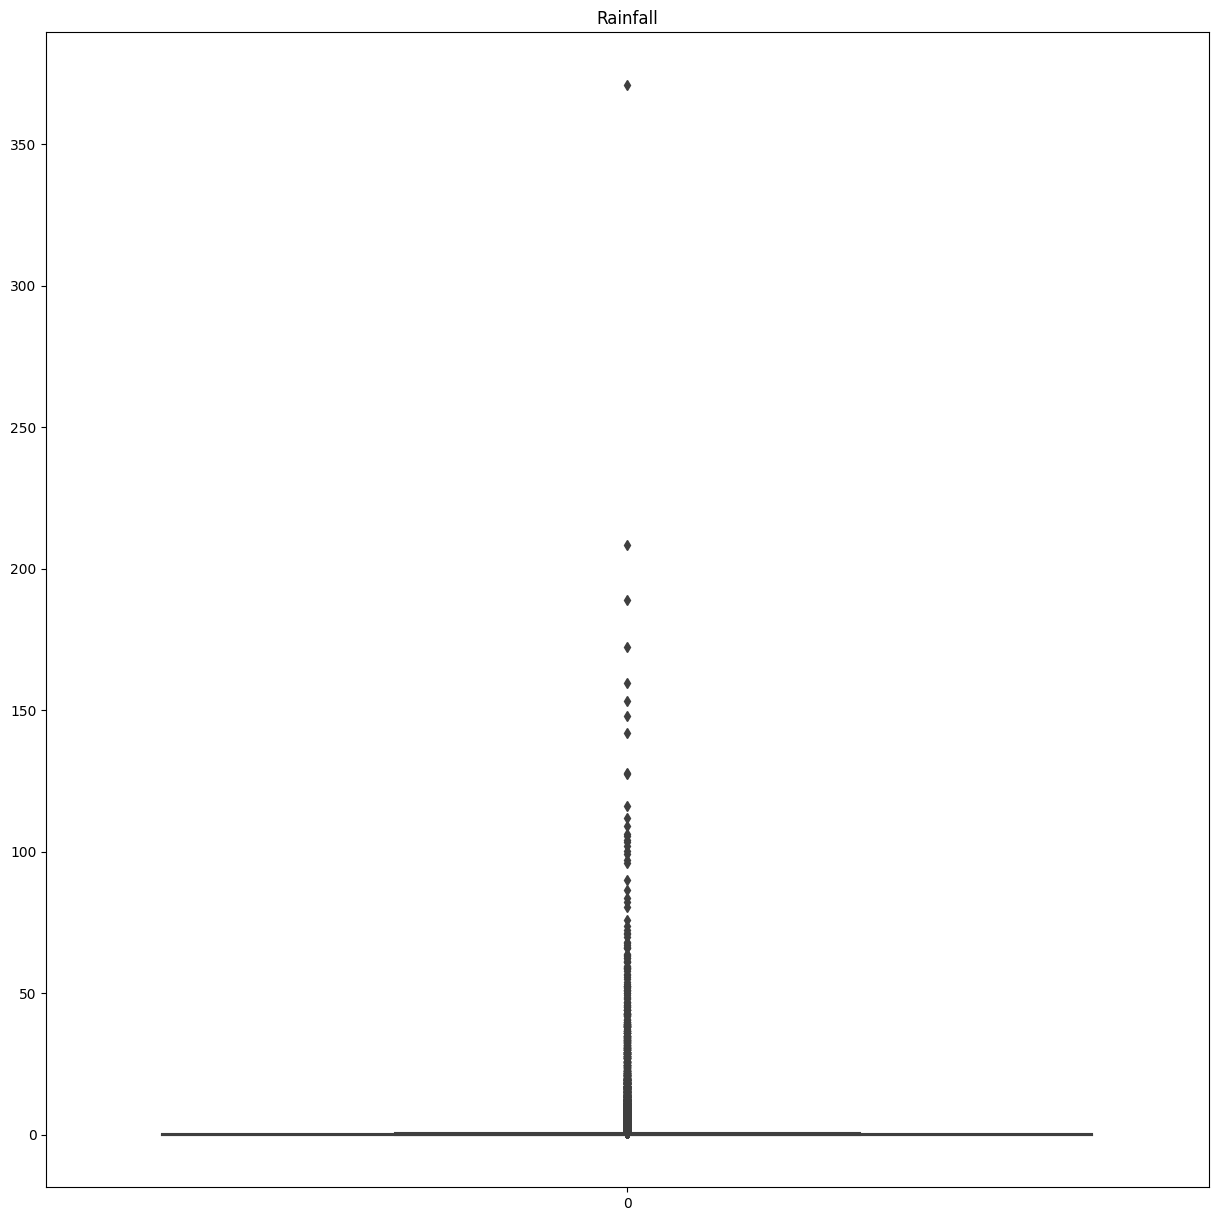

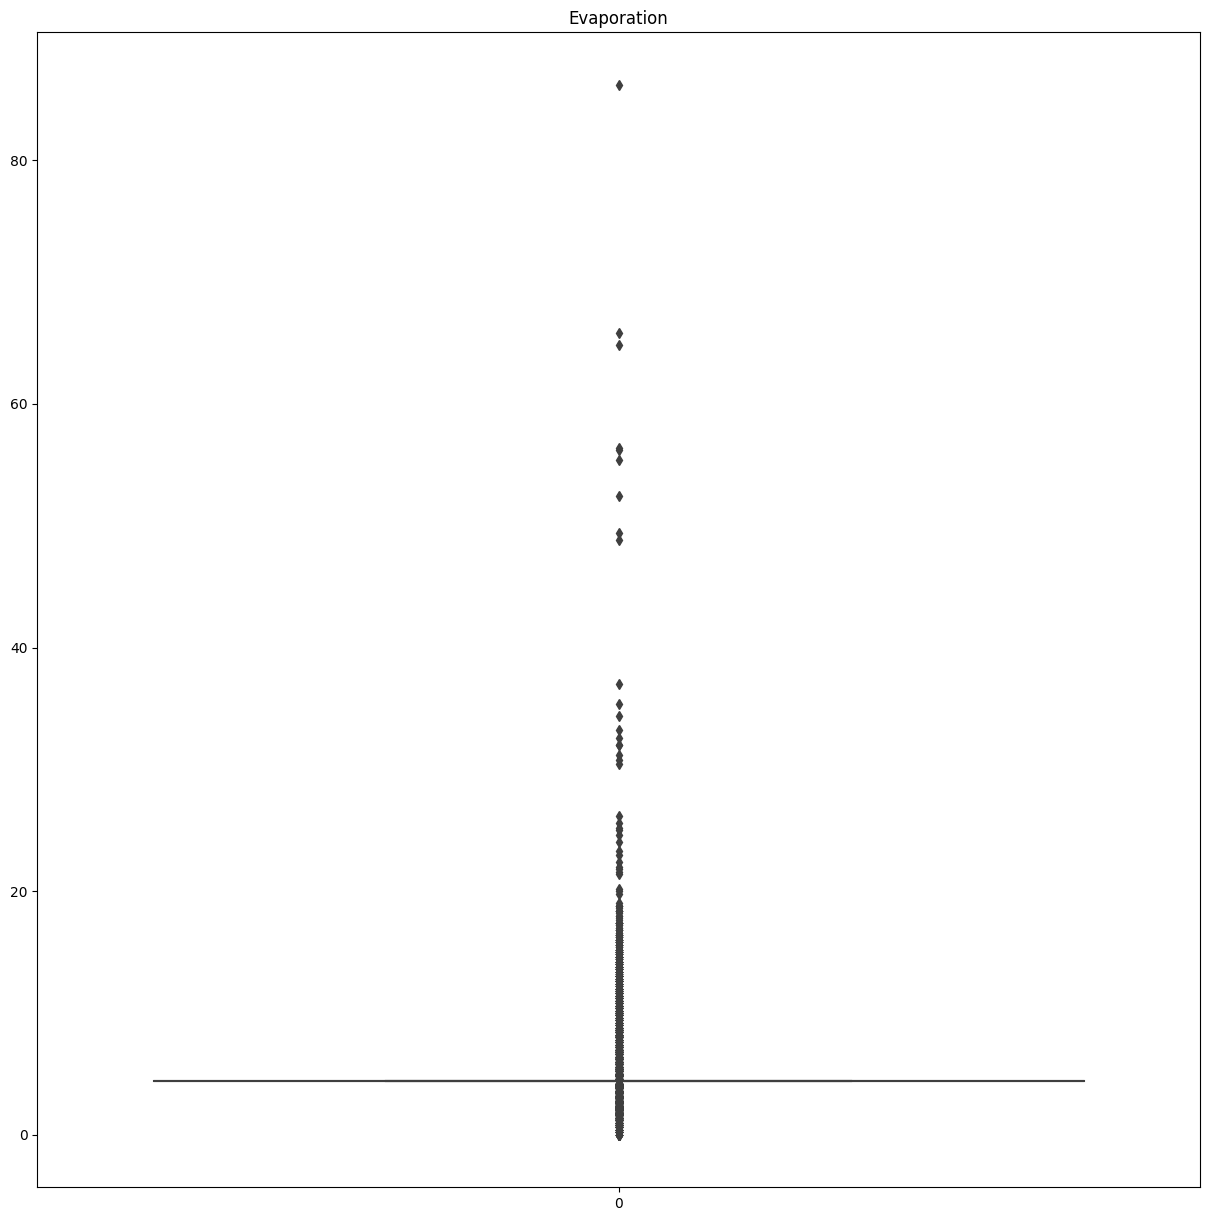

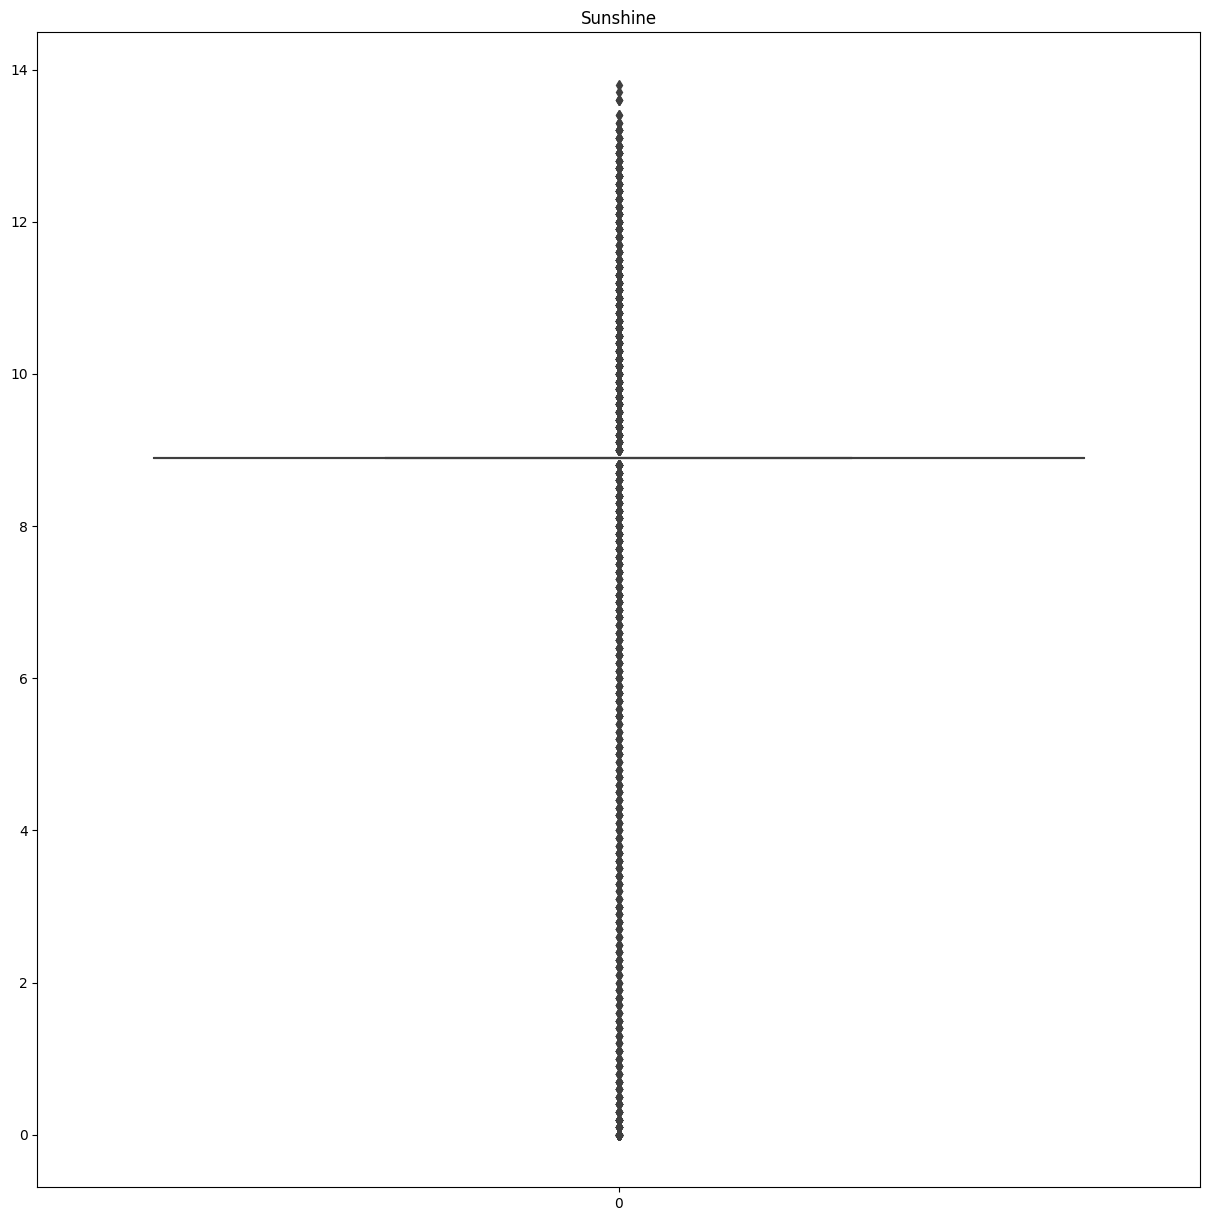

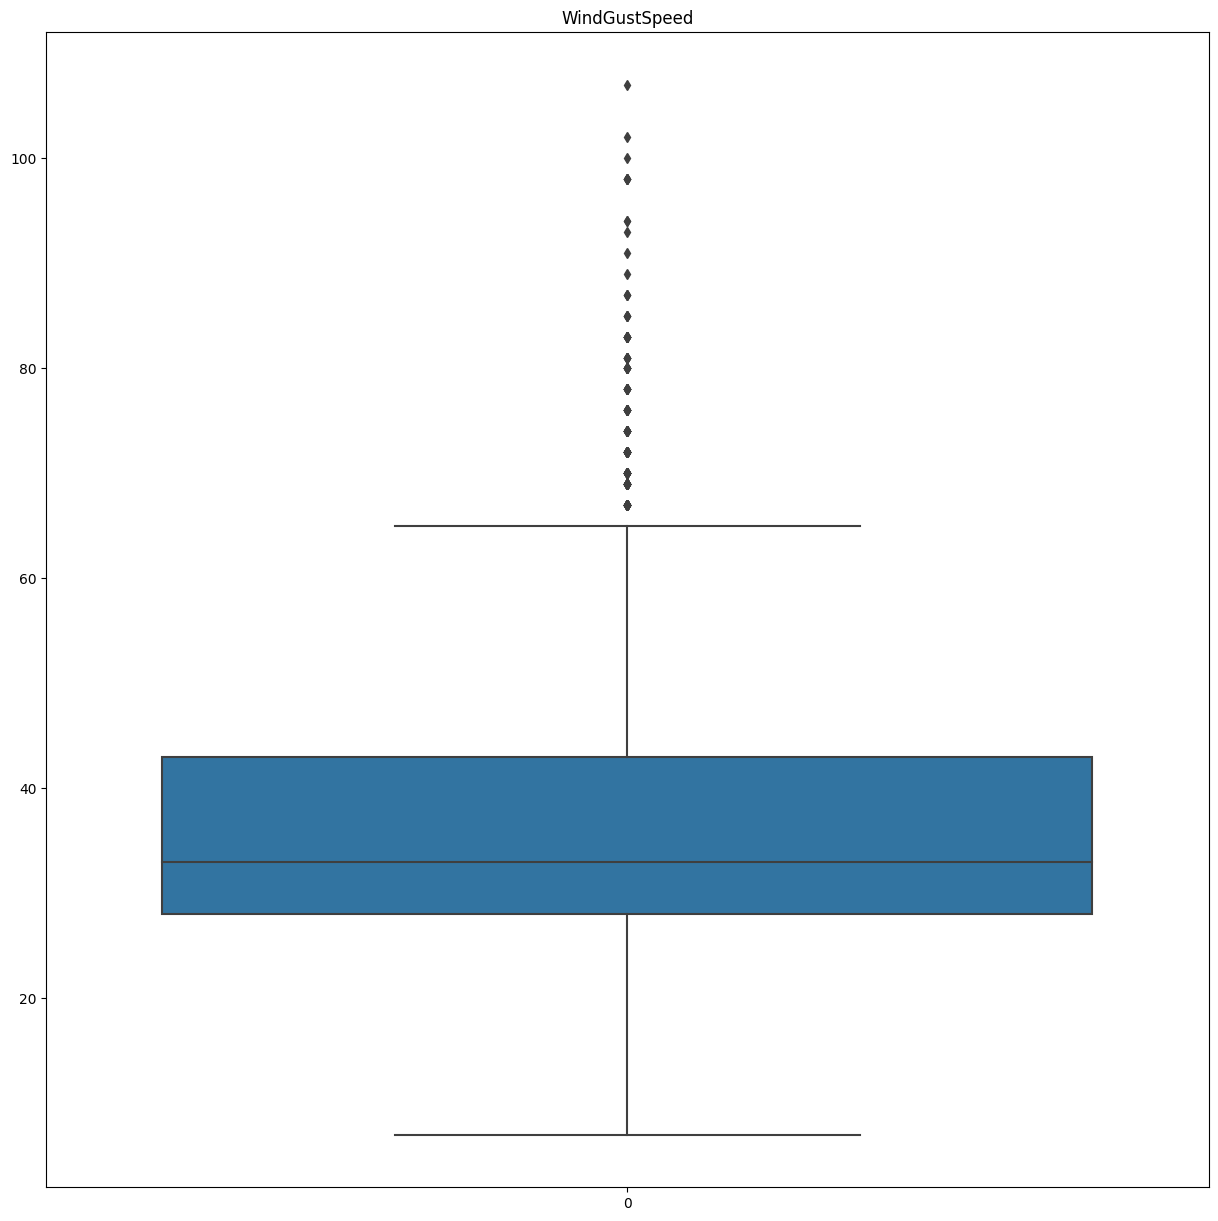

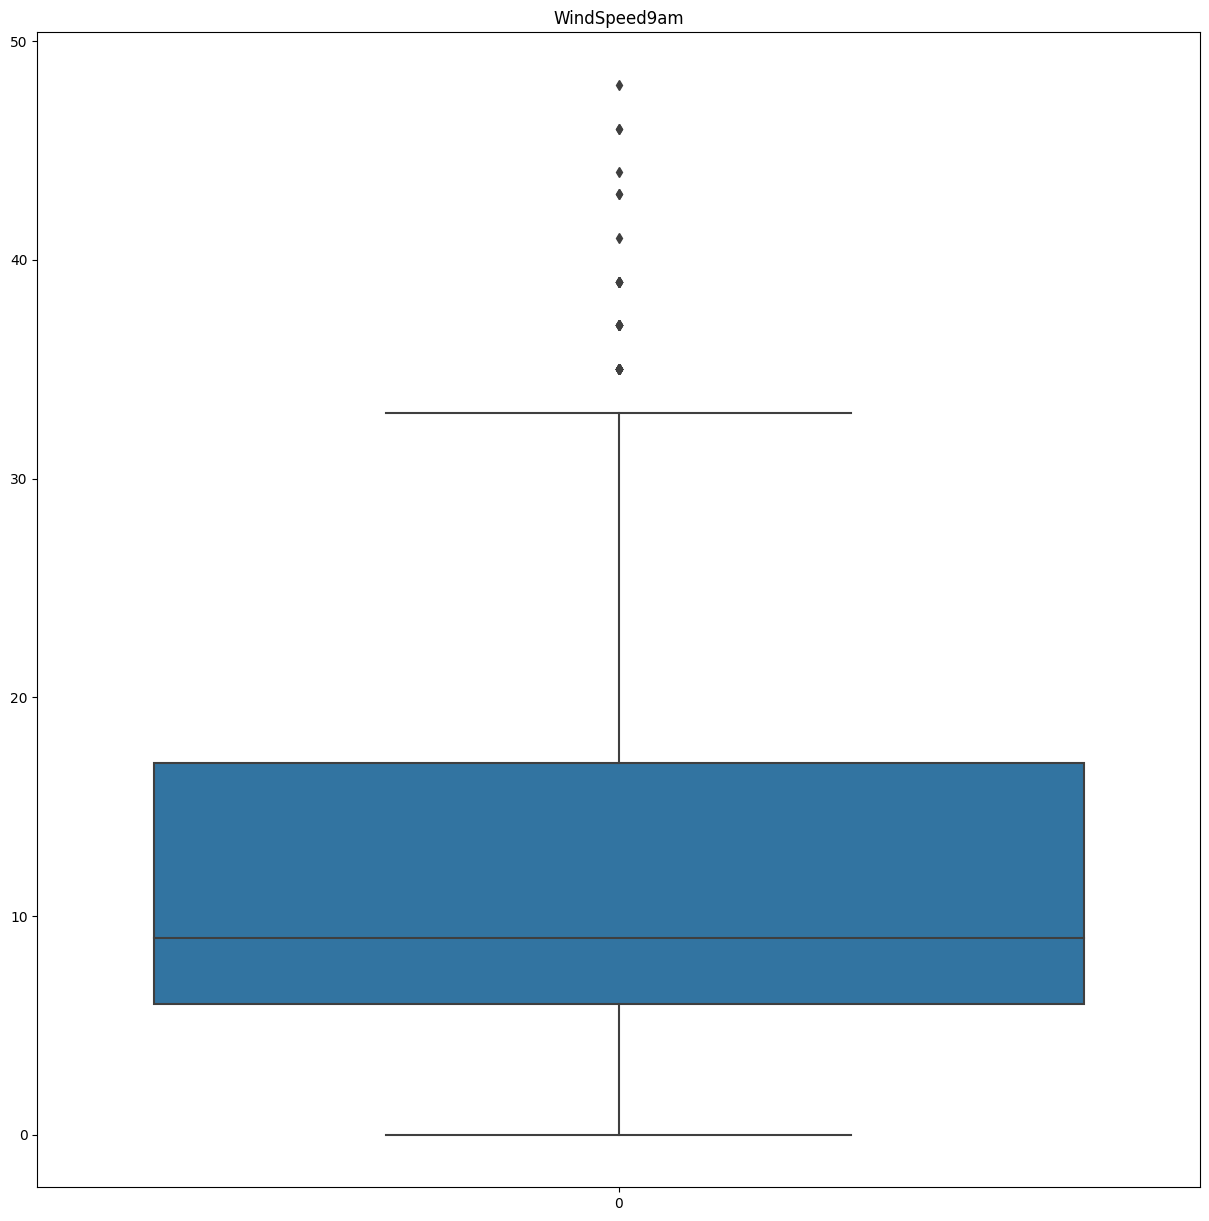

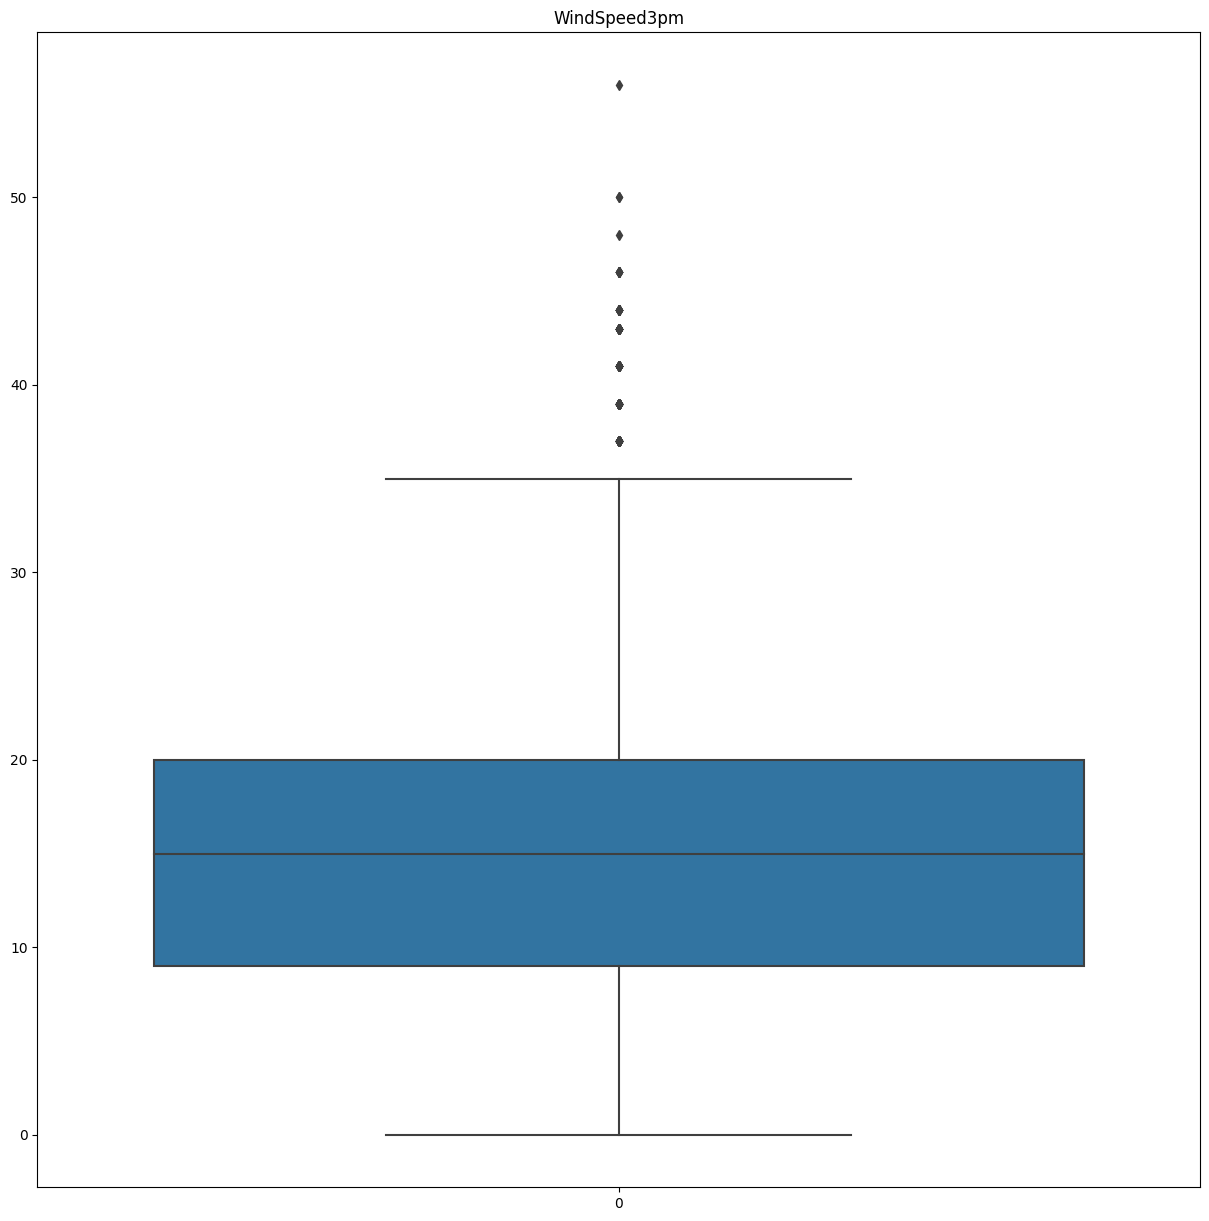

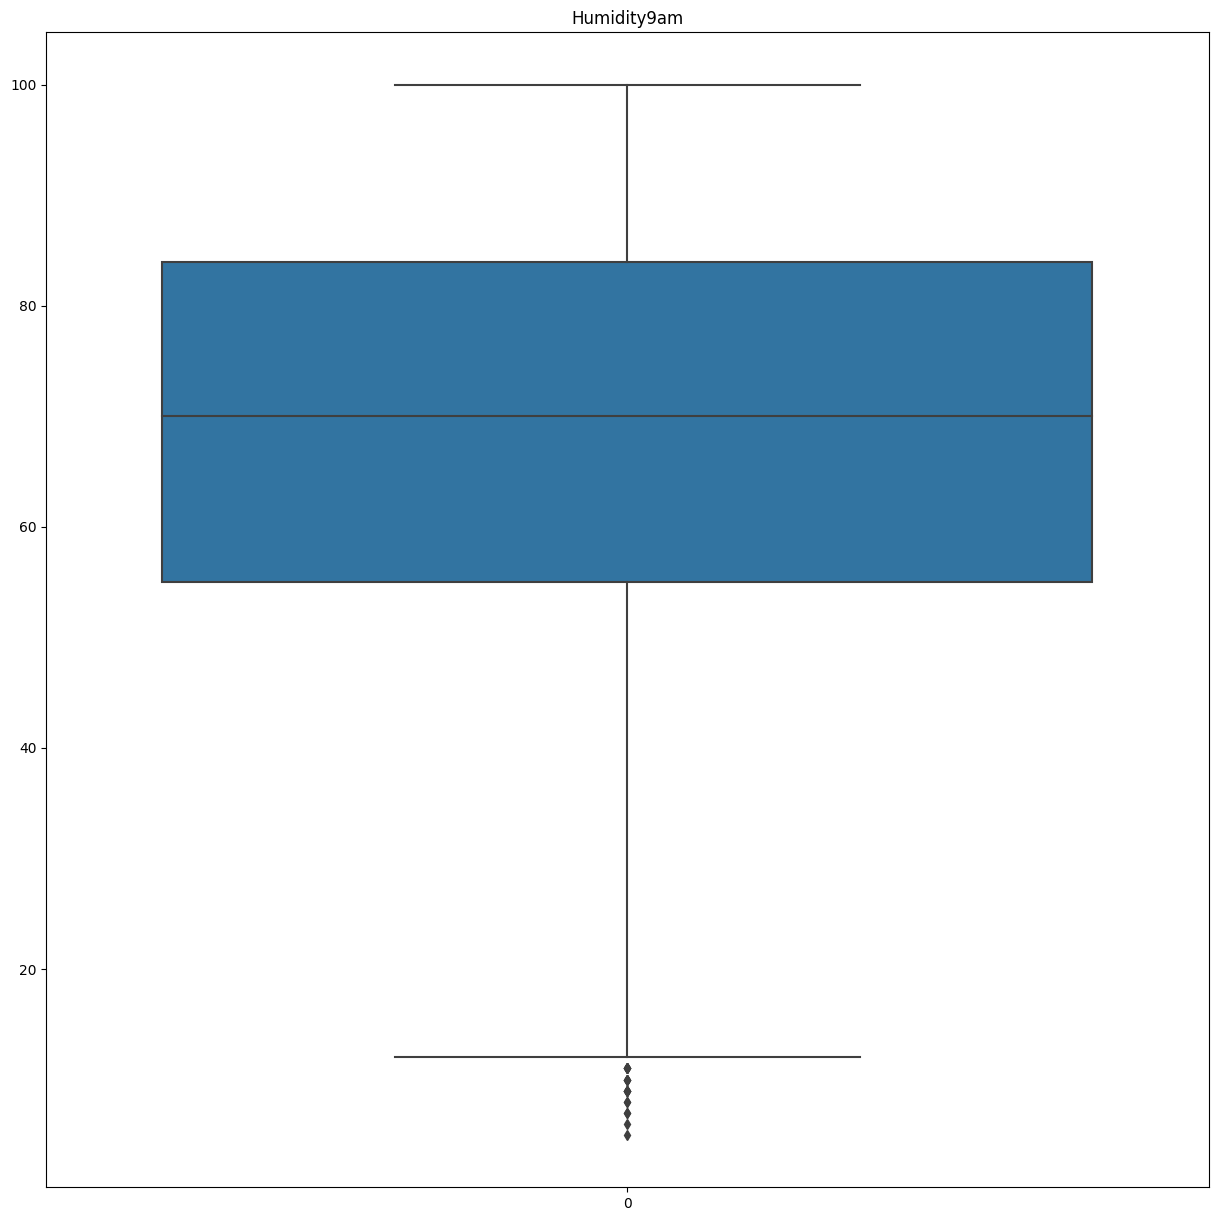

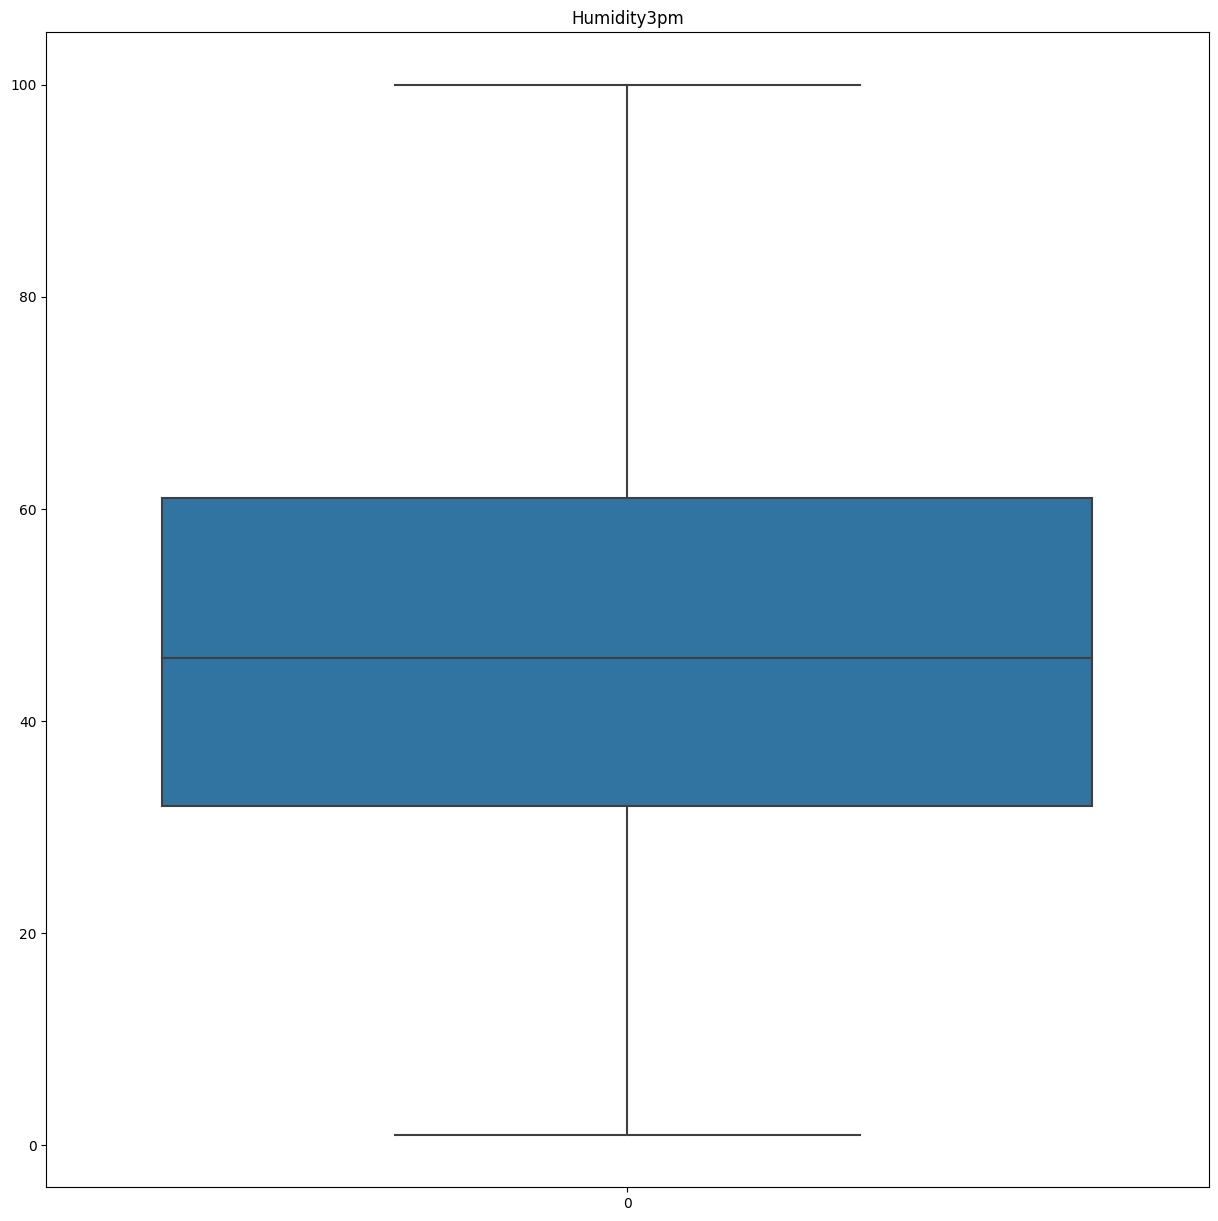

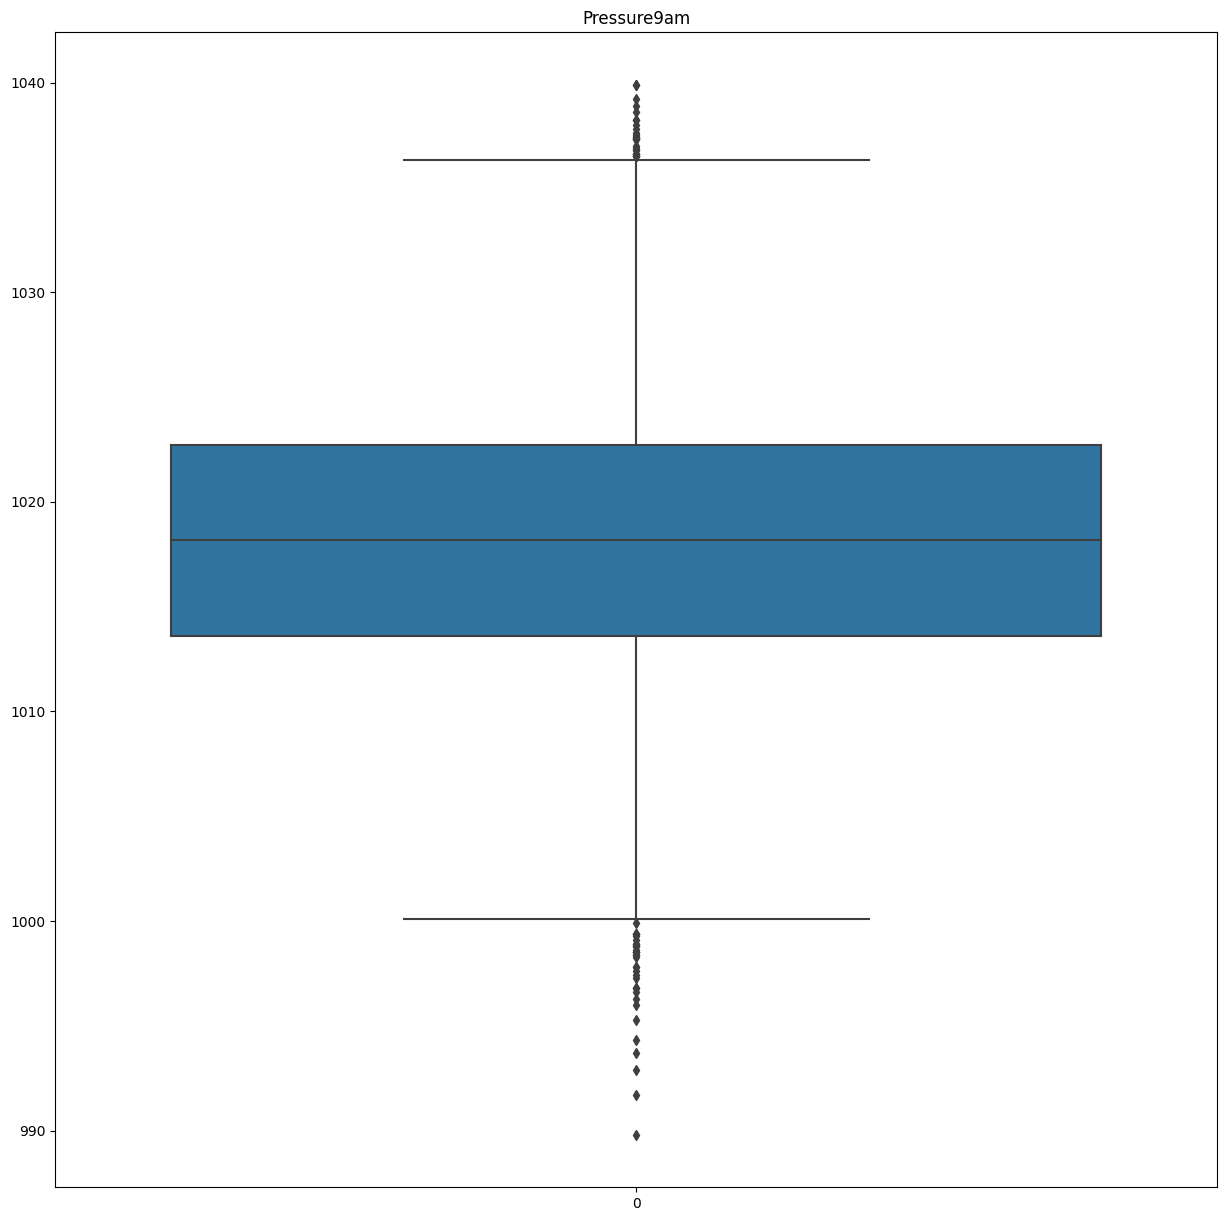

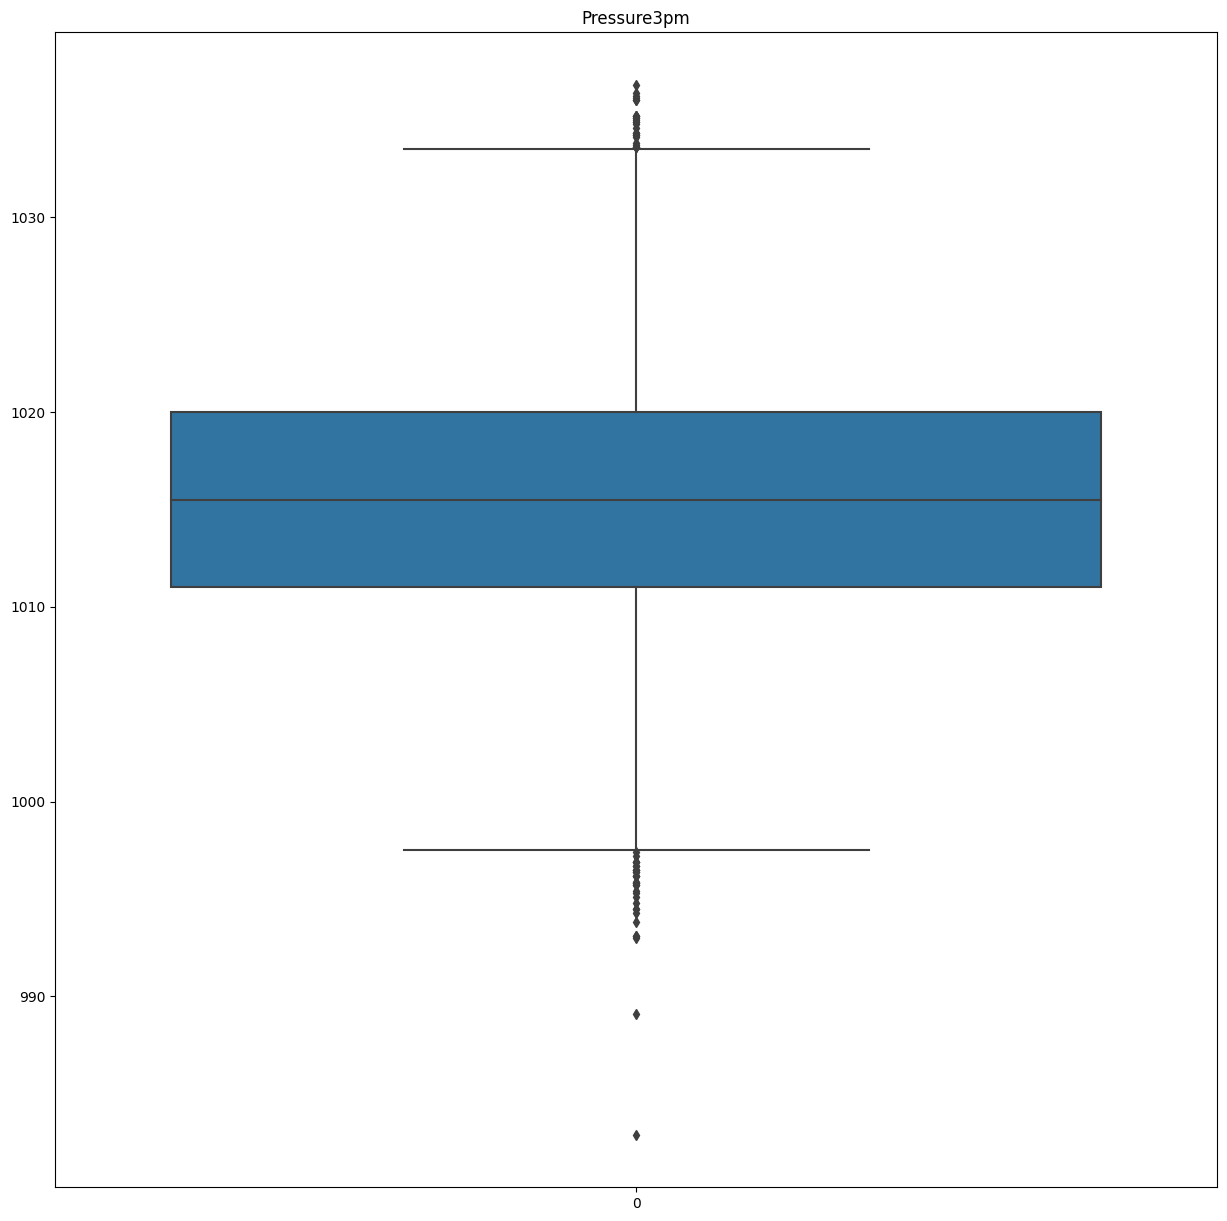

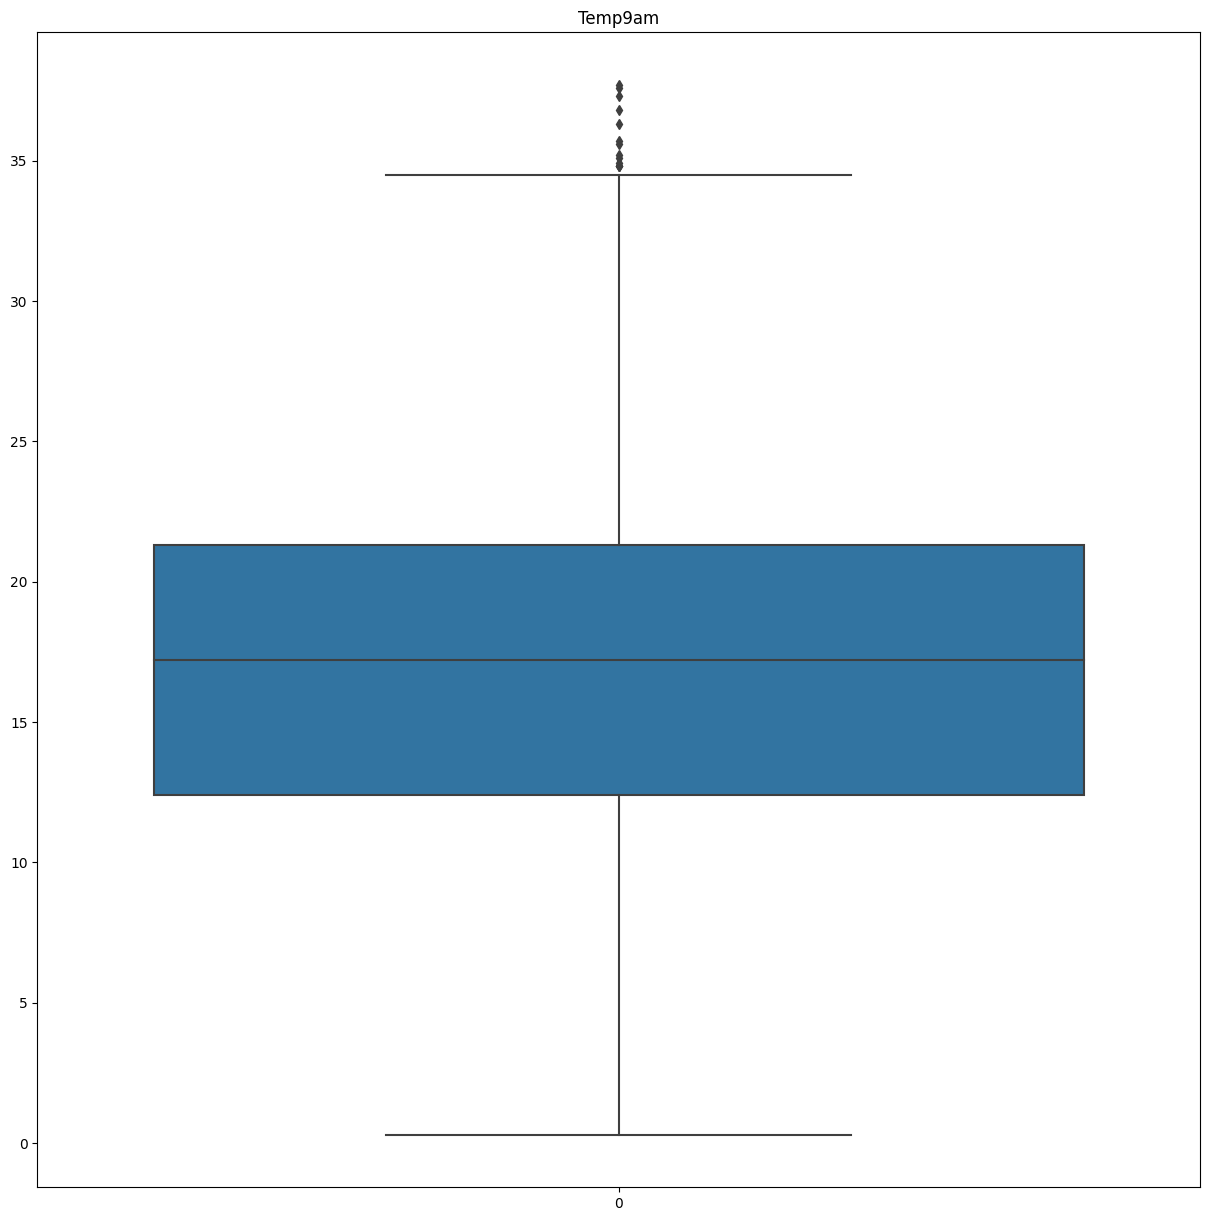

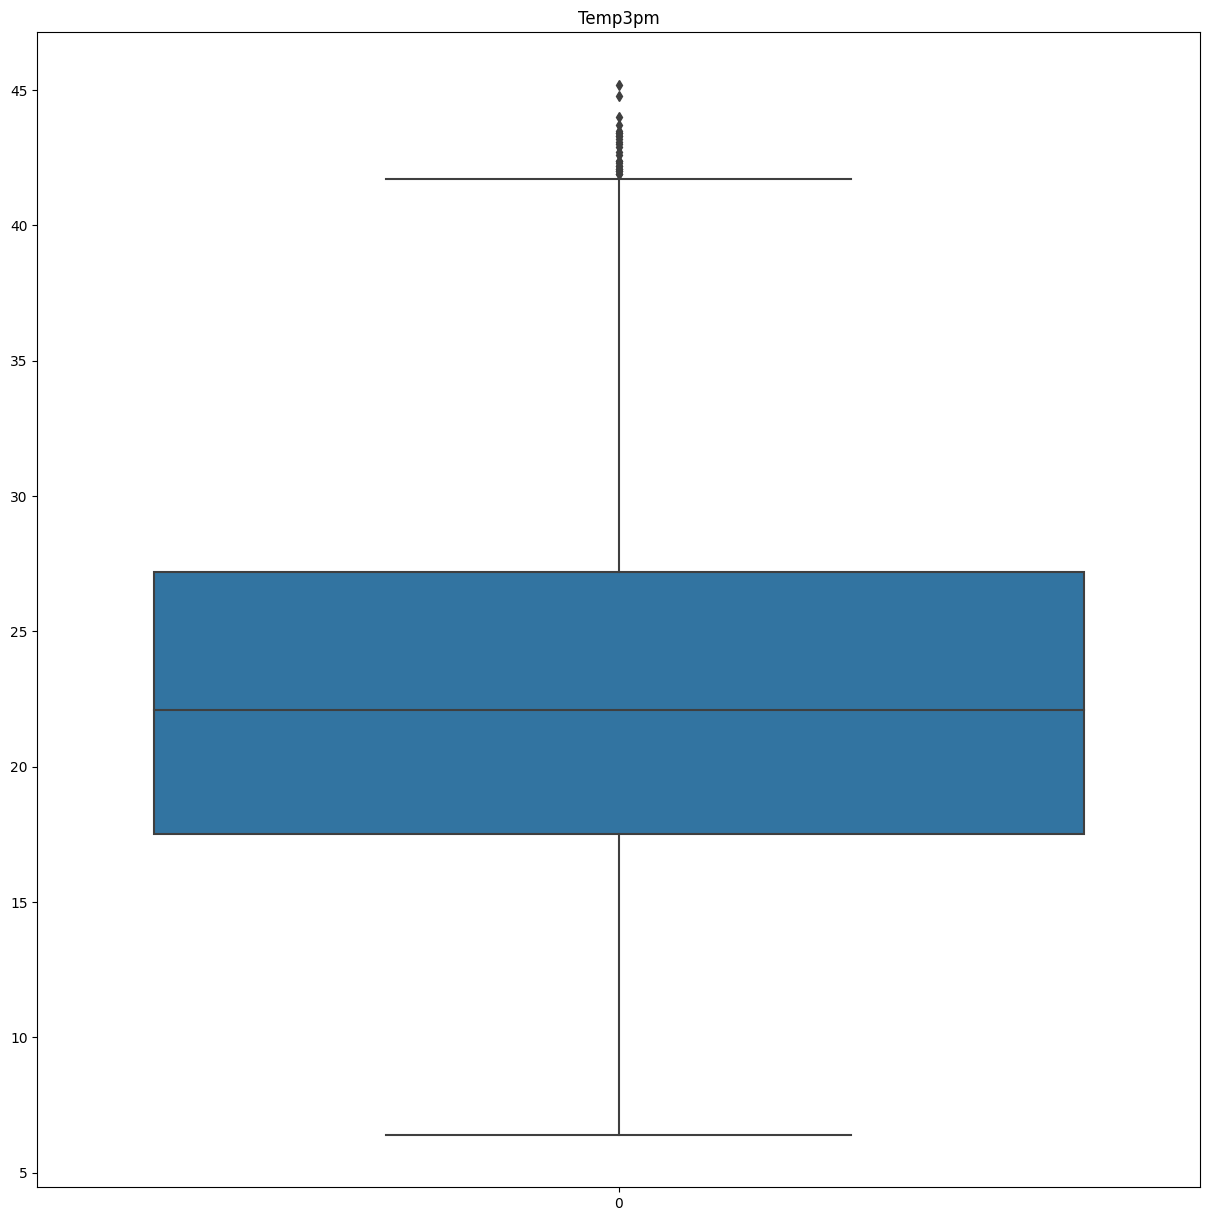

<Figure size 1500x1500 with 0 Axes>

In [ ]:
for feature in continuous_feature:
    data = df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize = (15,15))

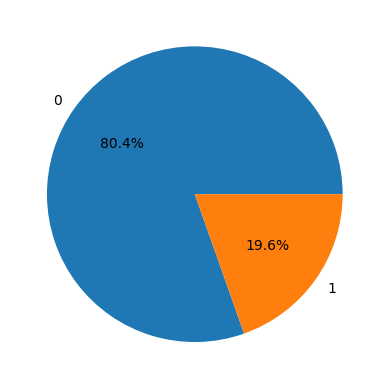

In [ ]:
plt.pie(df['RainTomorrow'].value_counts().values,
labels = df['RainToday'].value_counts().index,
autopct='%1.1f%%')
plt.show()


<Axes: xlabel='RainTomorrow', ylabel='Density'>

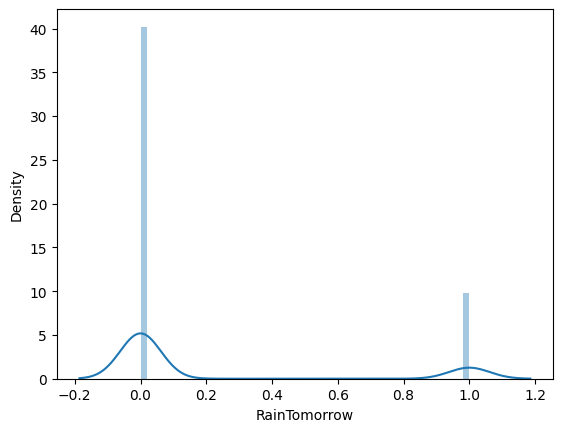

In [ ]:
sns.distplot(df['RainTomorrow'])

<Axes: >

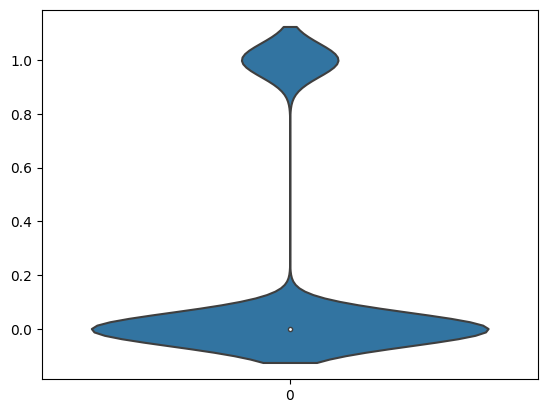

In [ ]:
sns.violinplot(df["RainToday"])

In [ ]:
def outliers(df, variable):
    IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    lower_bridge=df[variable].quantile(0.25)-(IQR*1.5)
    upper_bridge=df[variable].quantile(0.75)+(IQR*1.5)
#Print(lower_bridge,upper_bridge)
    df.loc[df[variable]>=upper_bridge,variable]=upper_bridge
    df.loc[df[variable]>=lower_bridge,variable]=lower_bridge

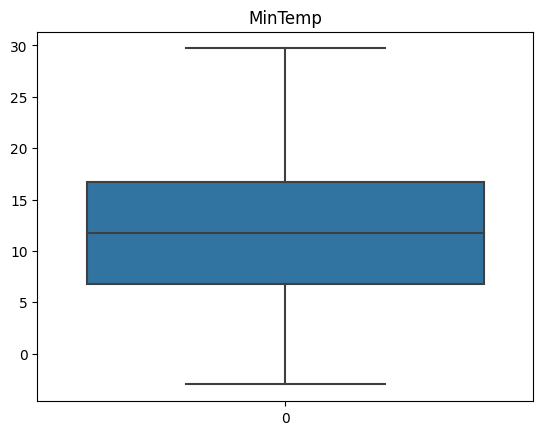

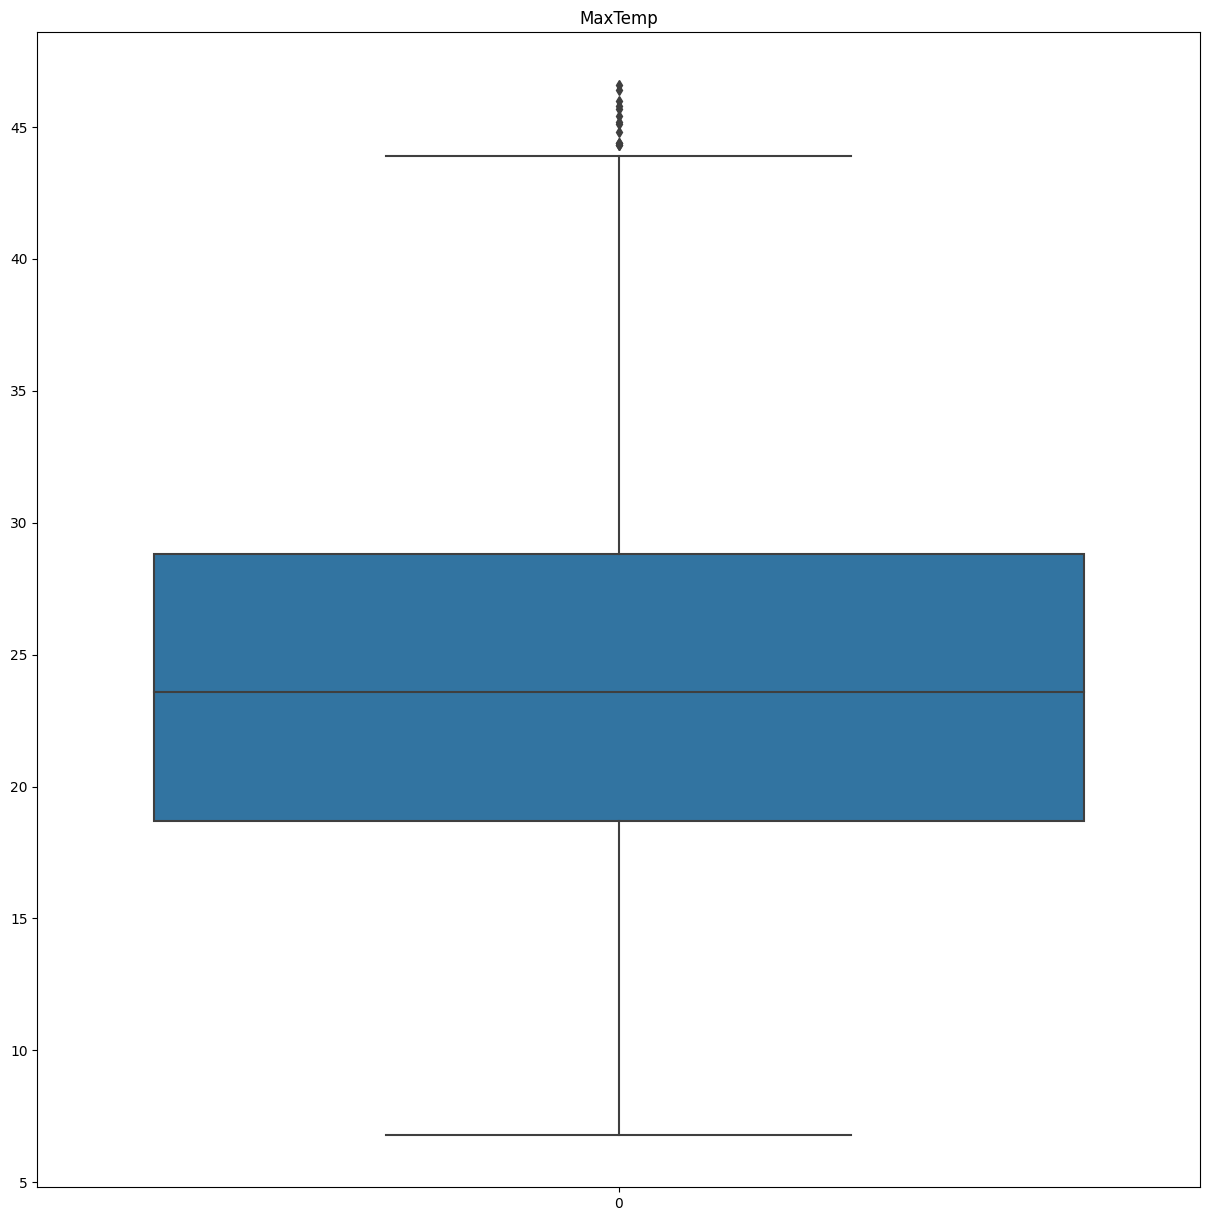

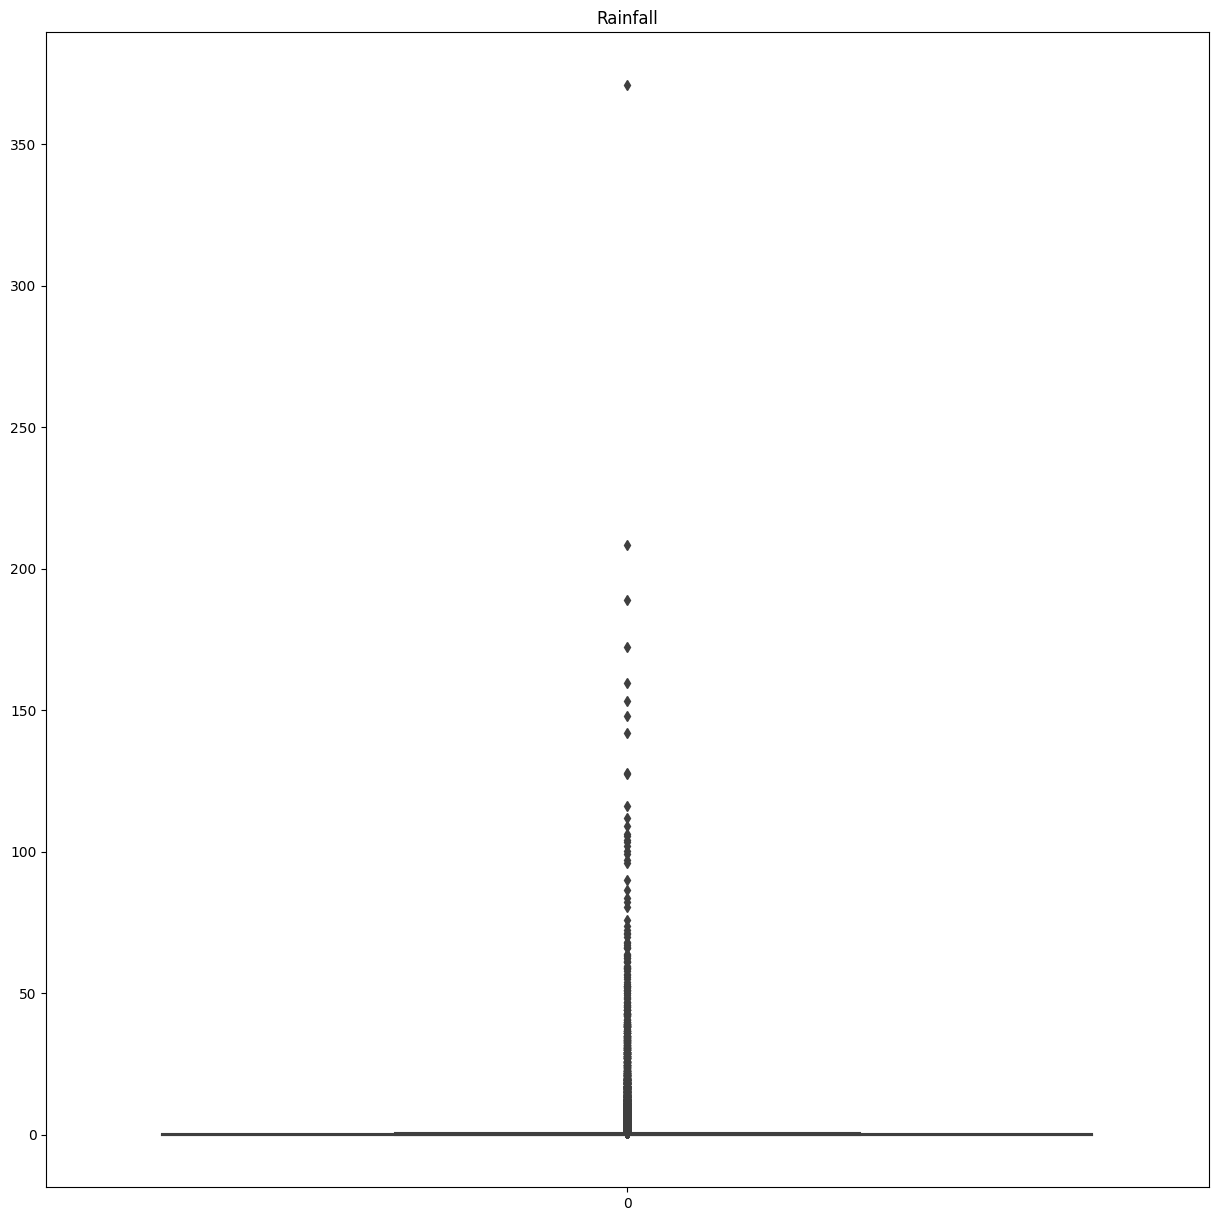

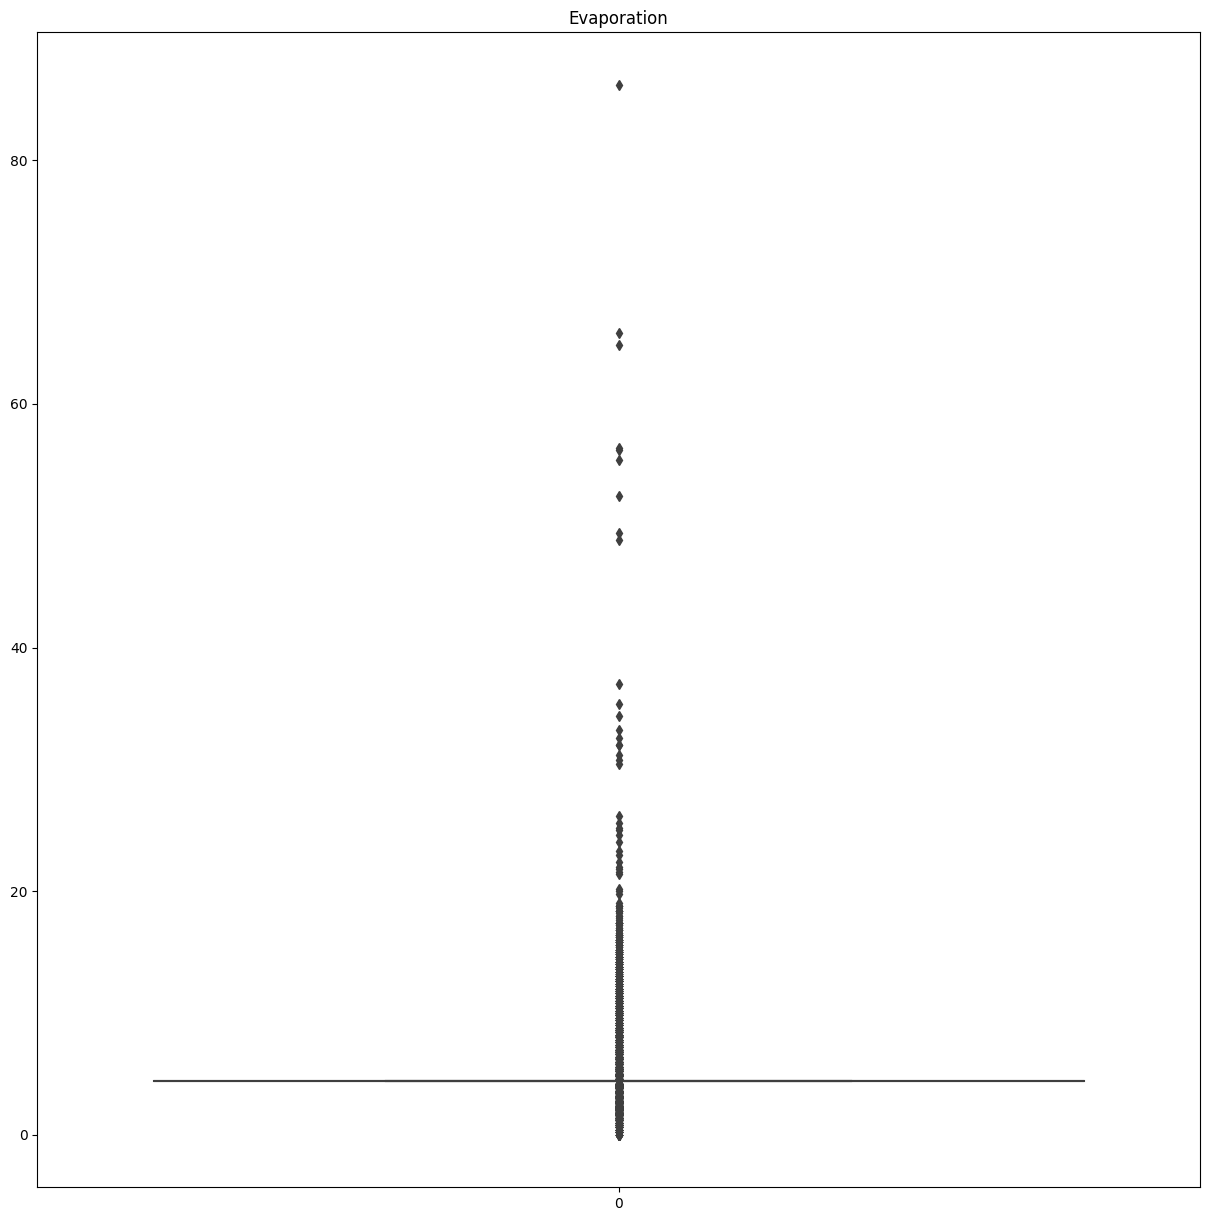

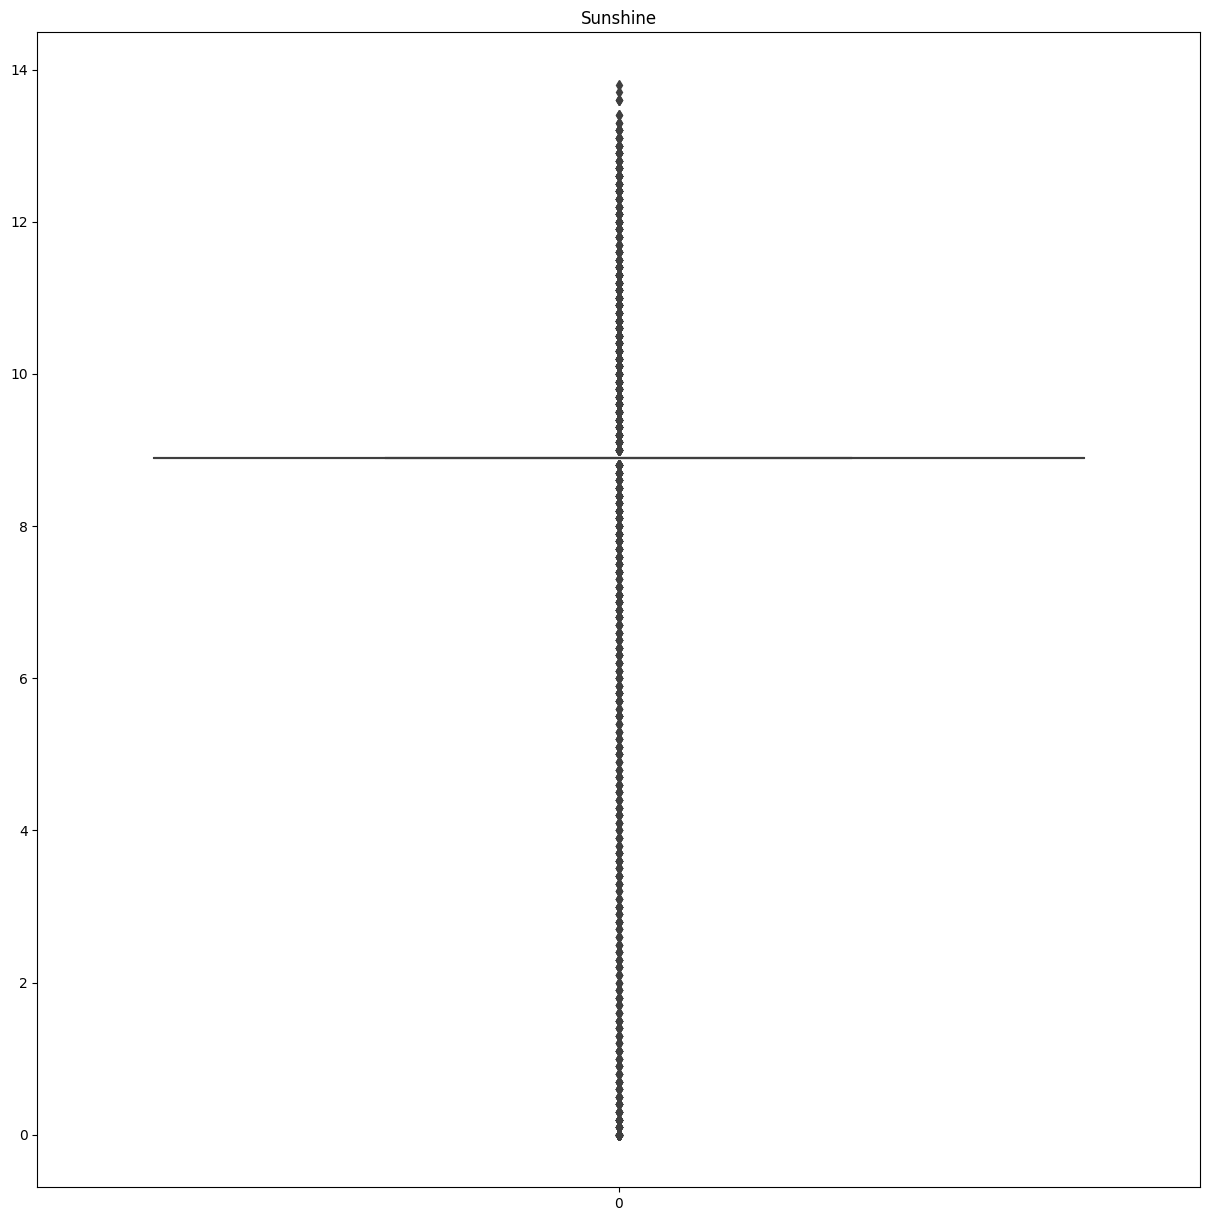

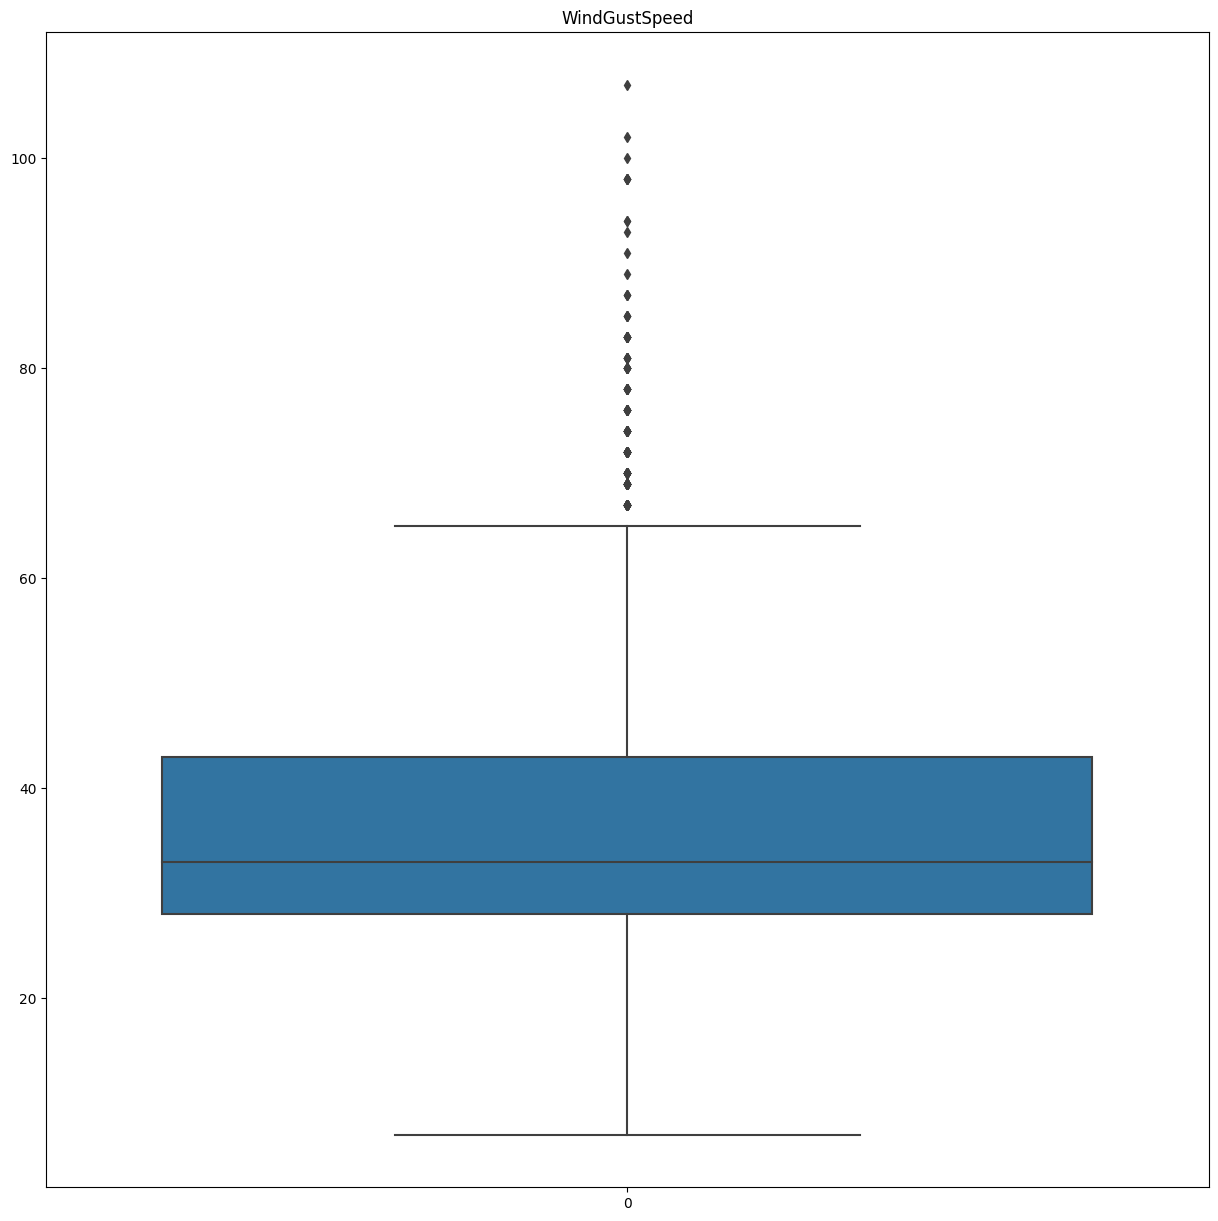

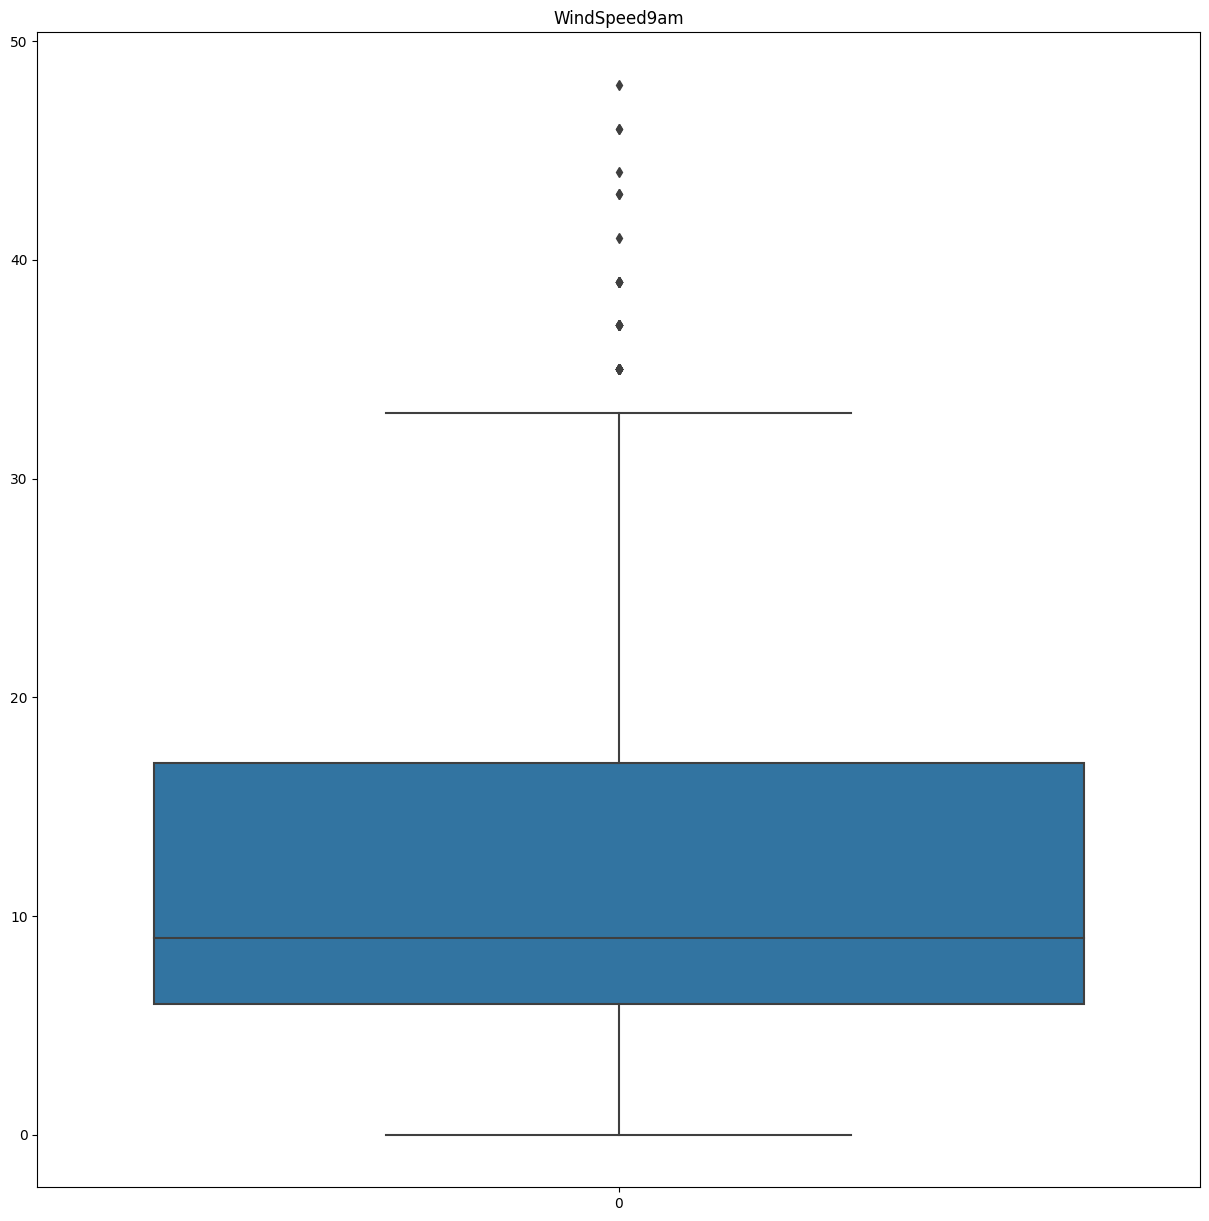

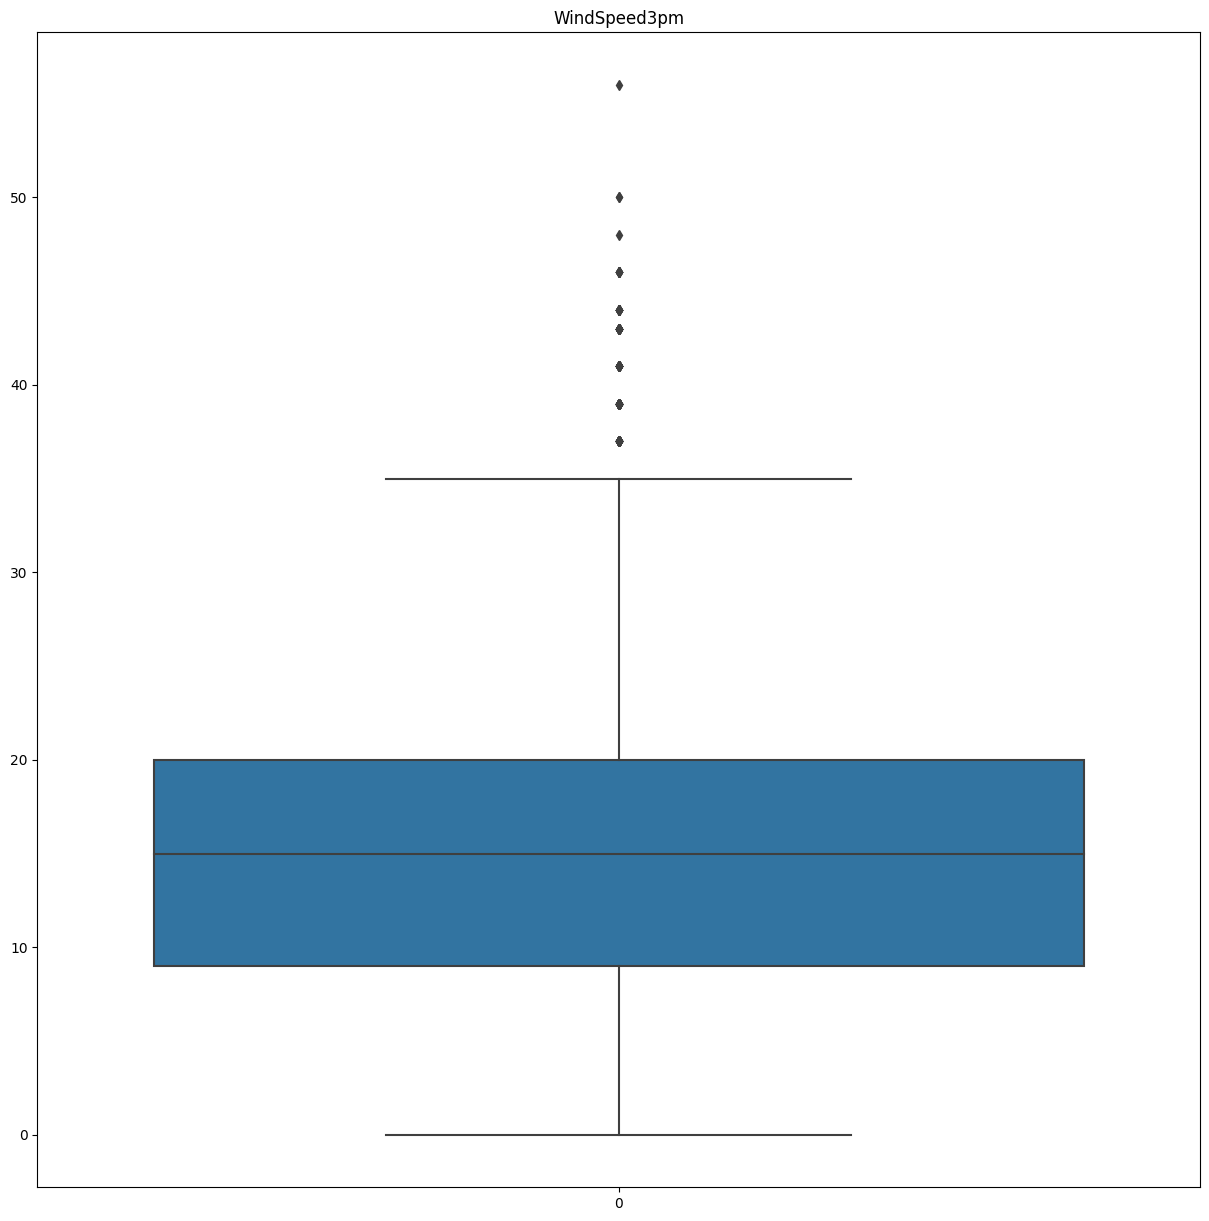

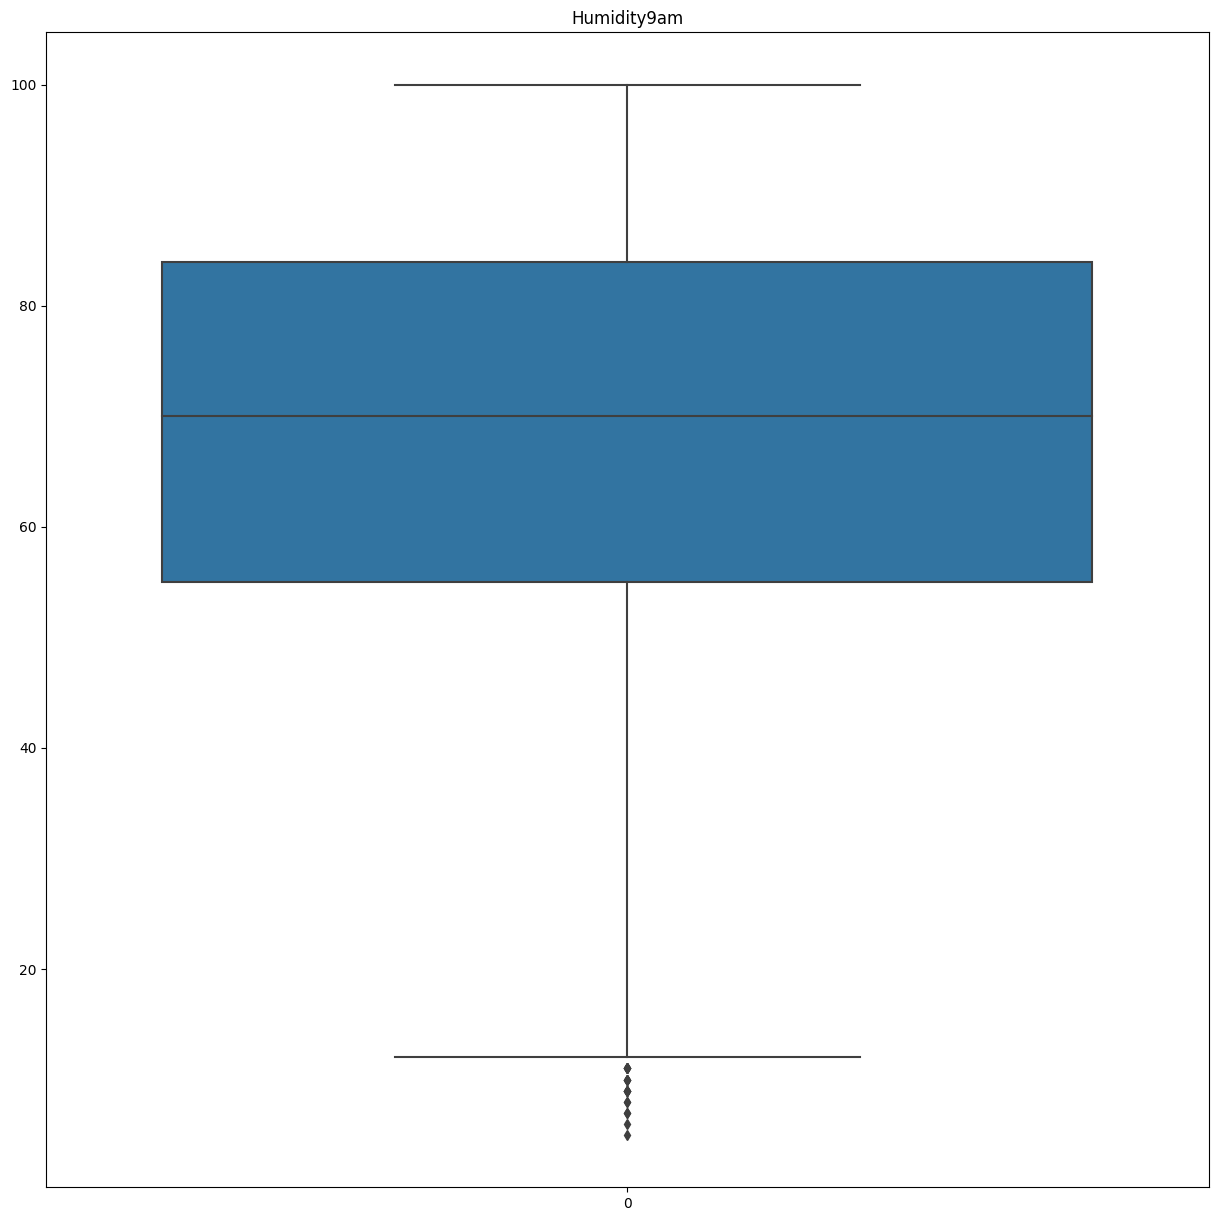

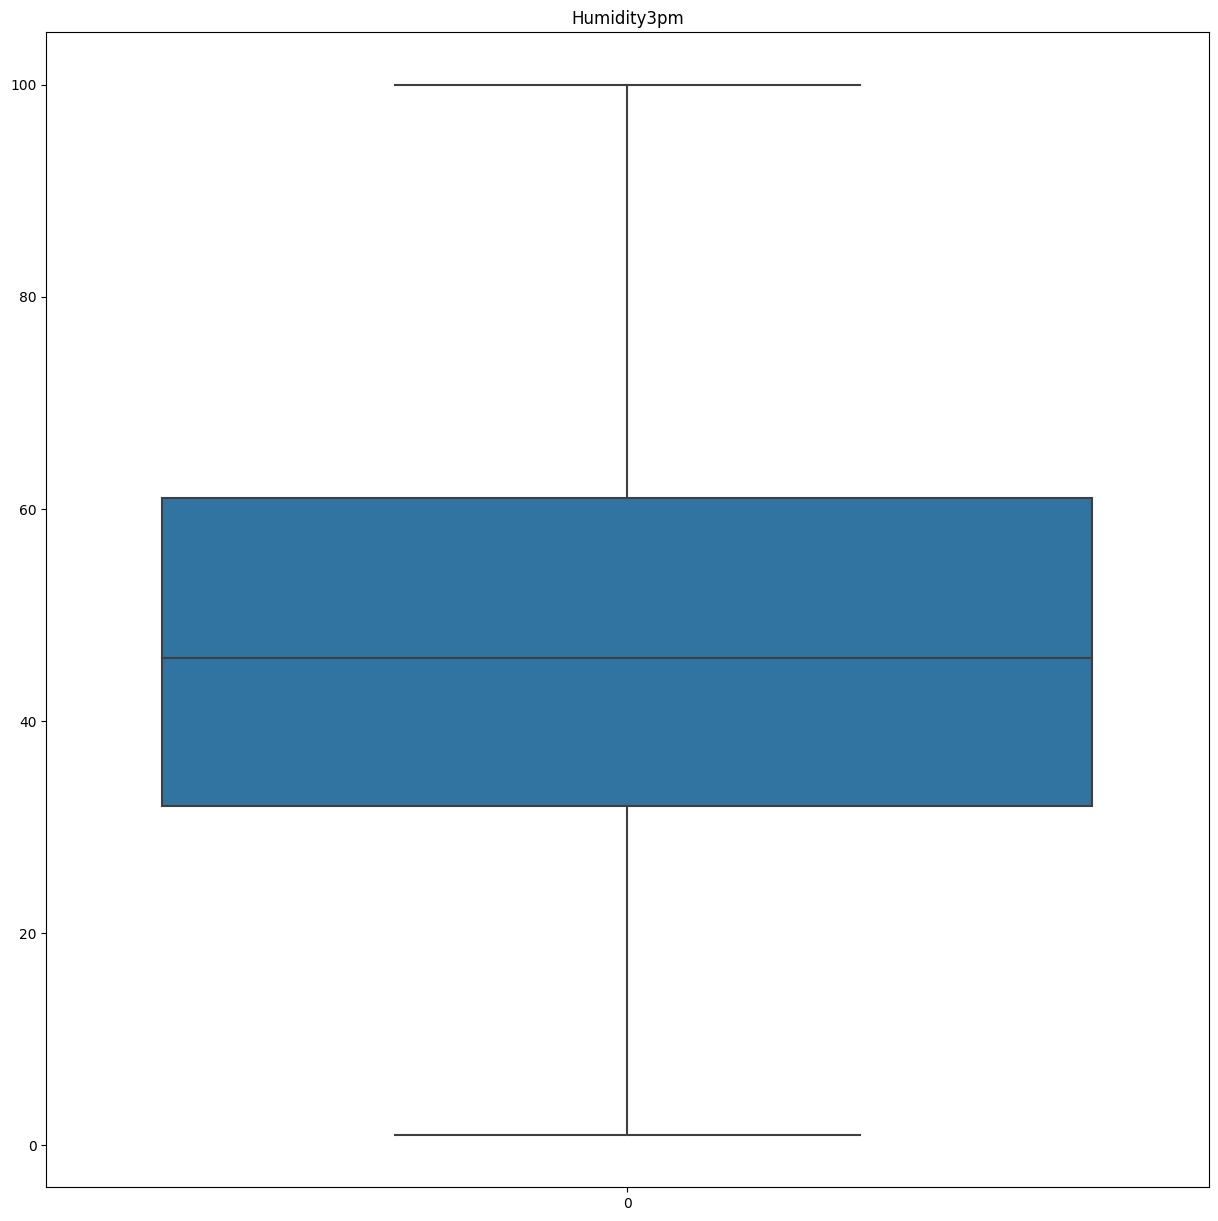

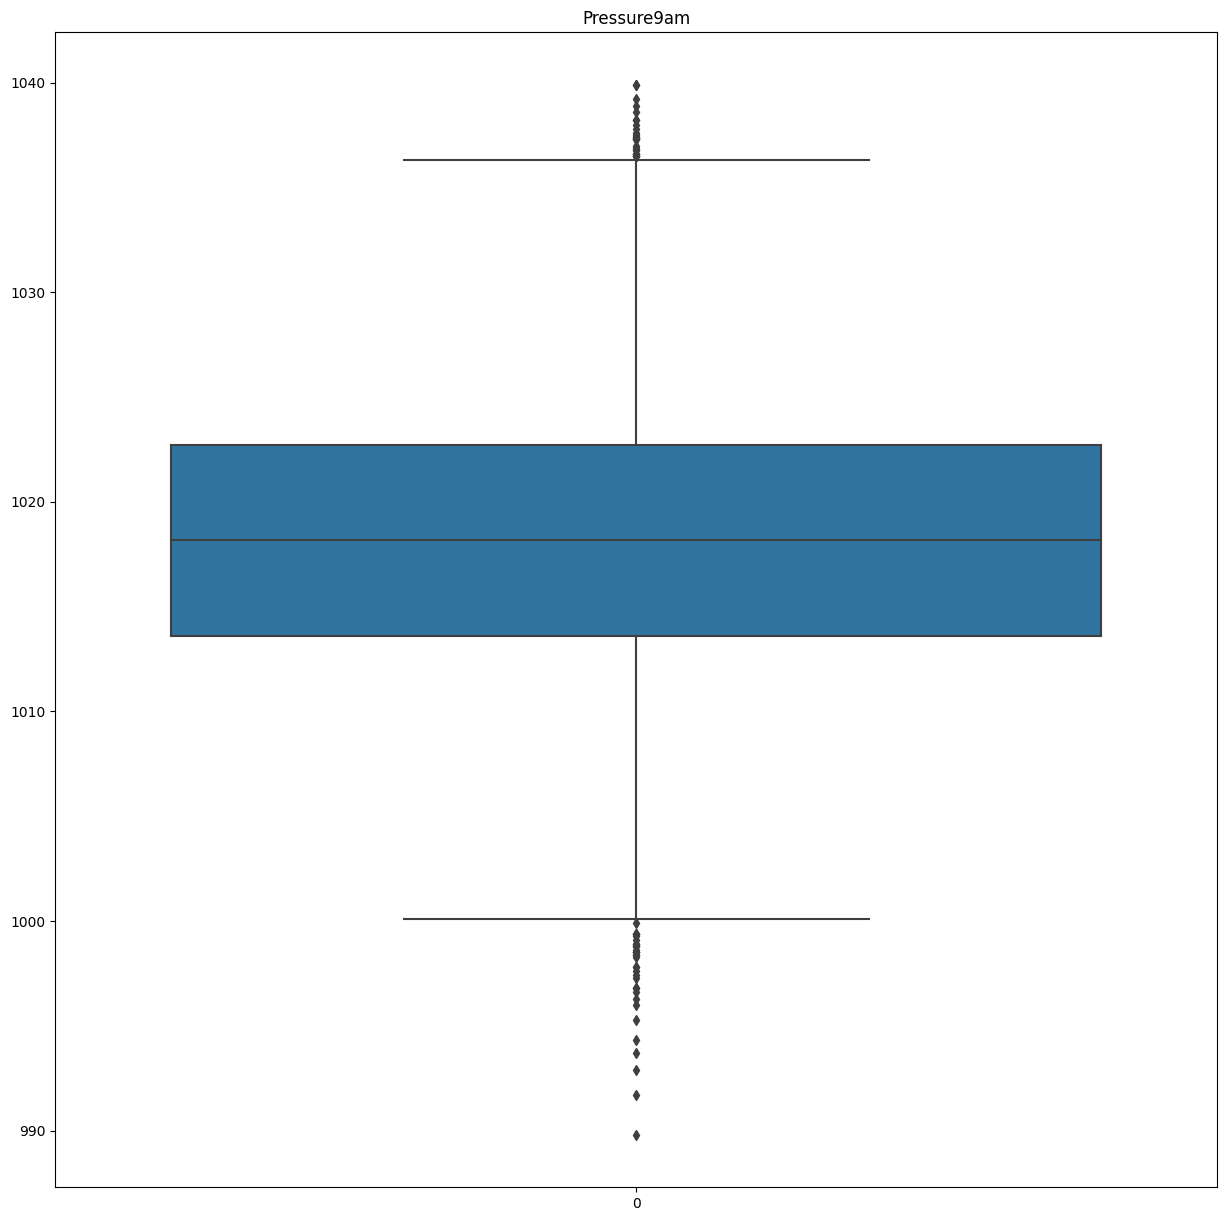

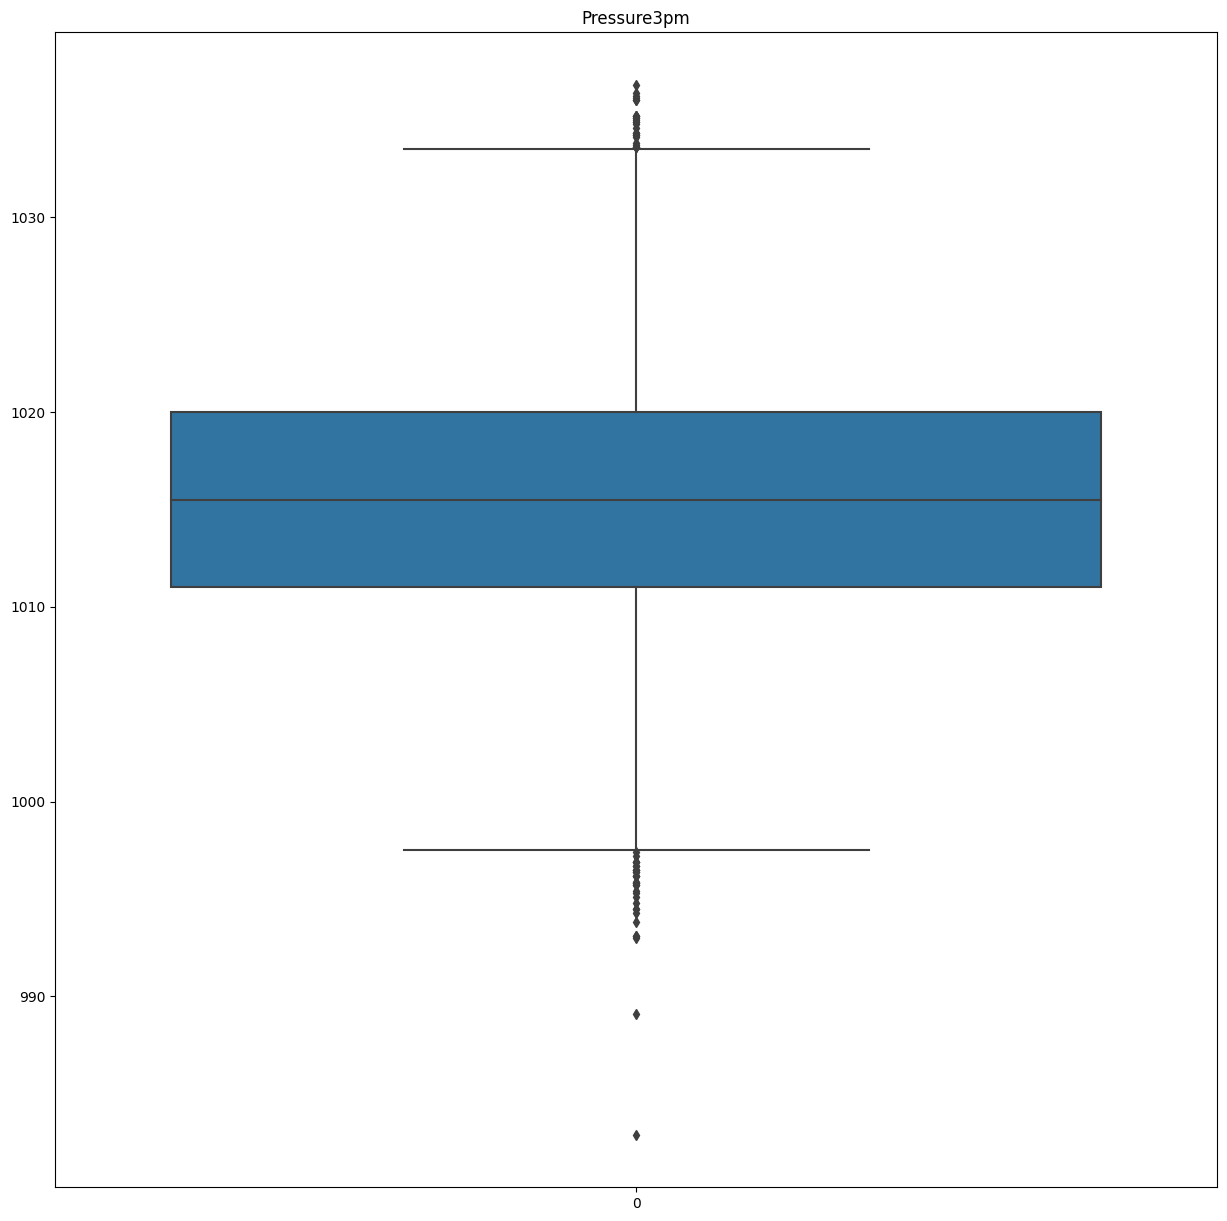

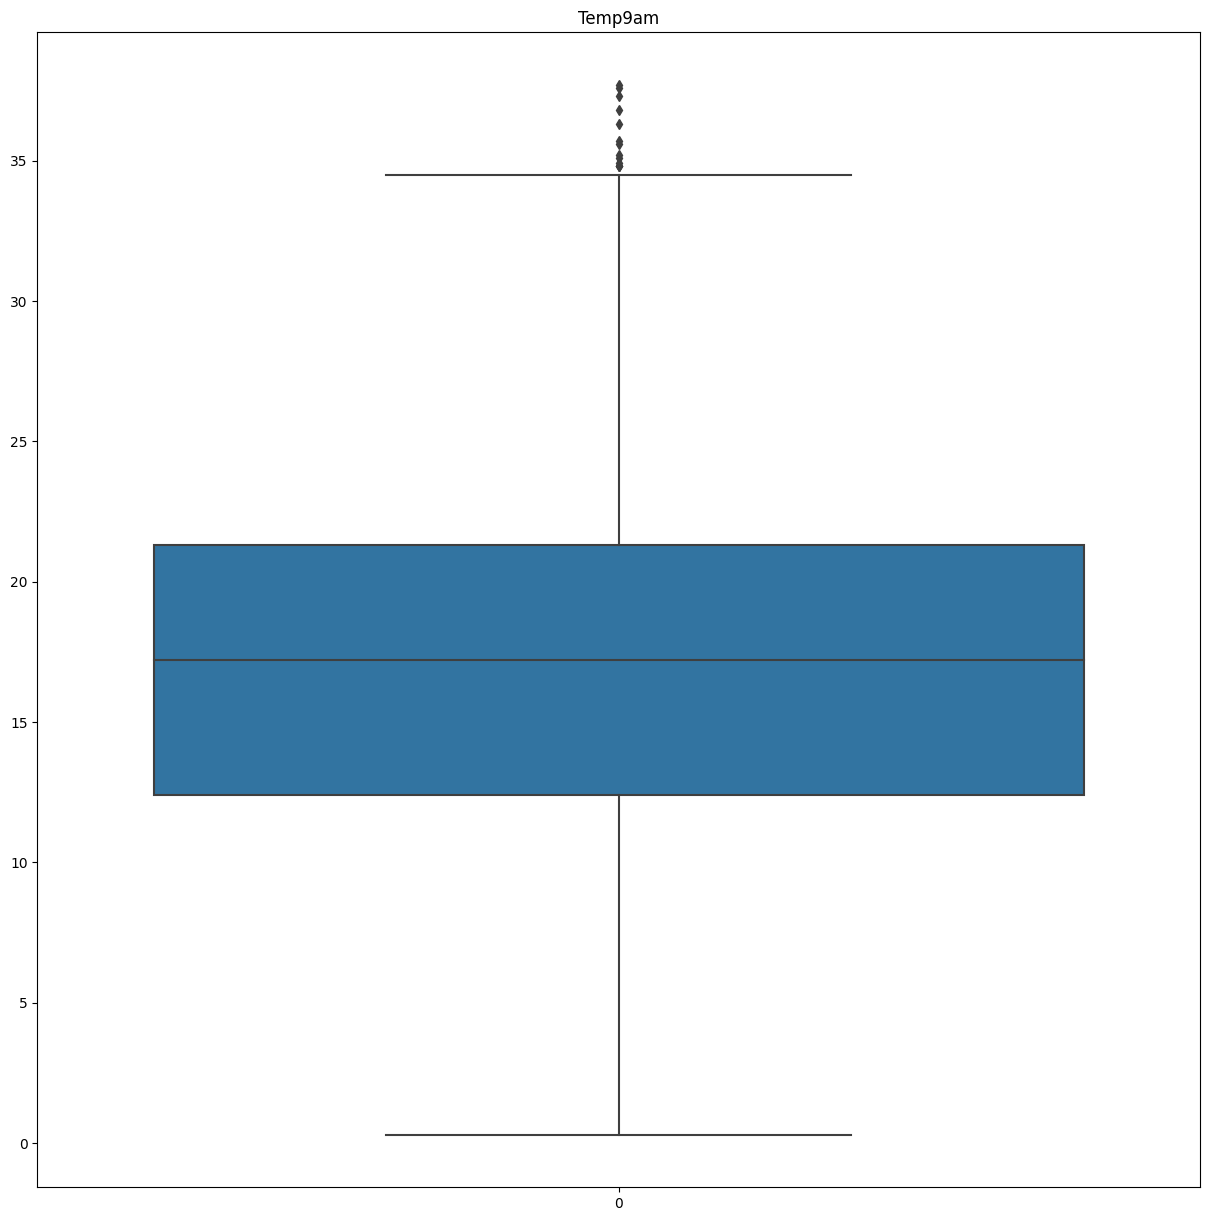

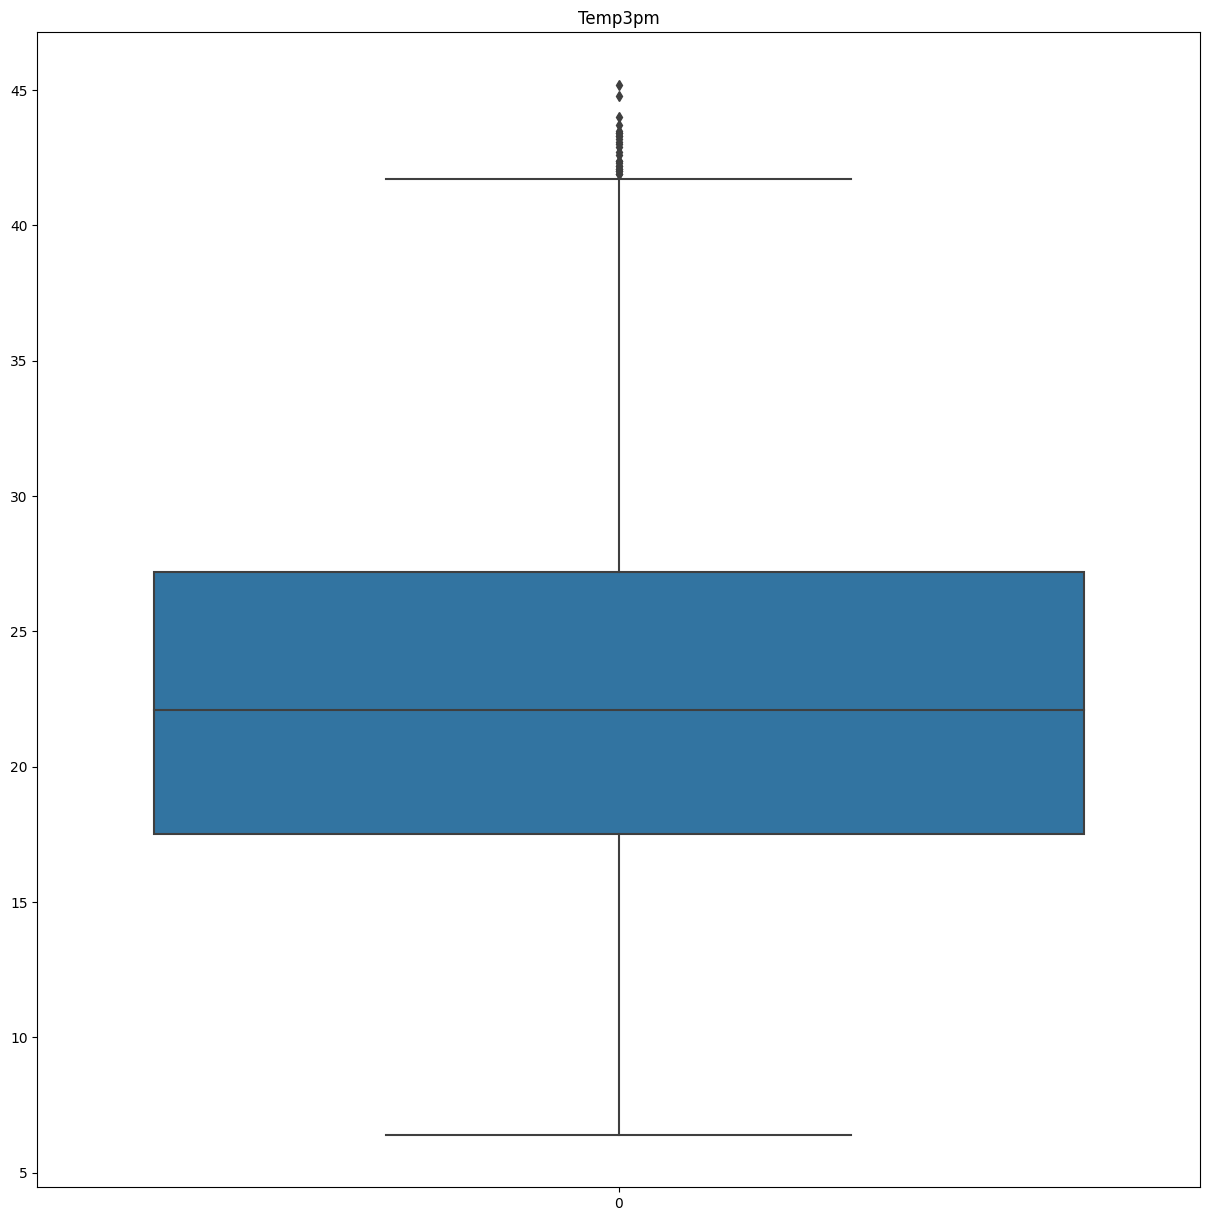

<Figure size 1500x1500 with 0 Axes>

In [ ]:
for feature in continuous_feature:
    data =df.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize = (15,15))

In [ ]:
#Data Analysis

In [ ]:
import scipy.stats as stats
def qq_plots(df, variable):
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[variable].hist()
    stats.probplot(df[variable], dist= "norm", plot=ply)
    plt.show()

MinTemp


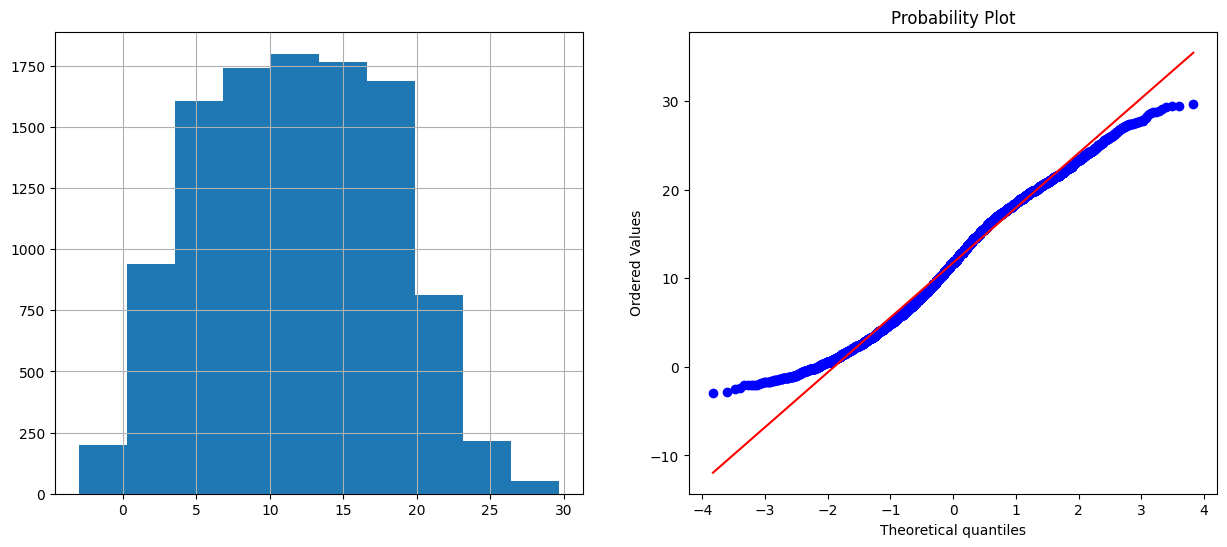

MaxTemp


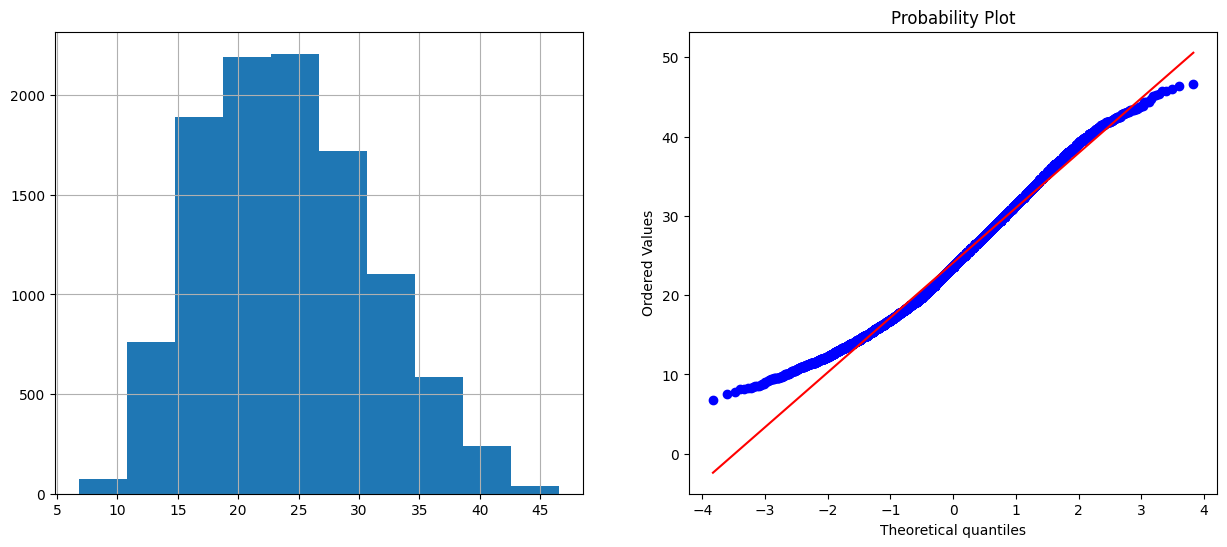

Rainfall


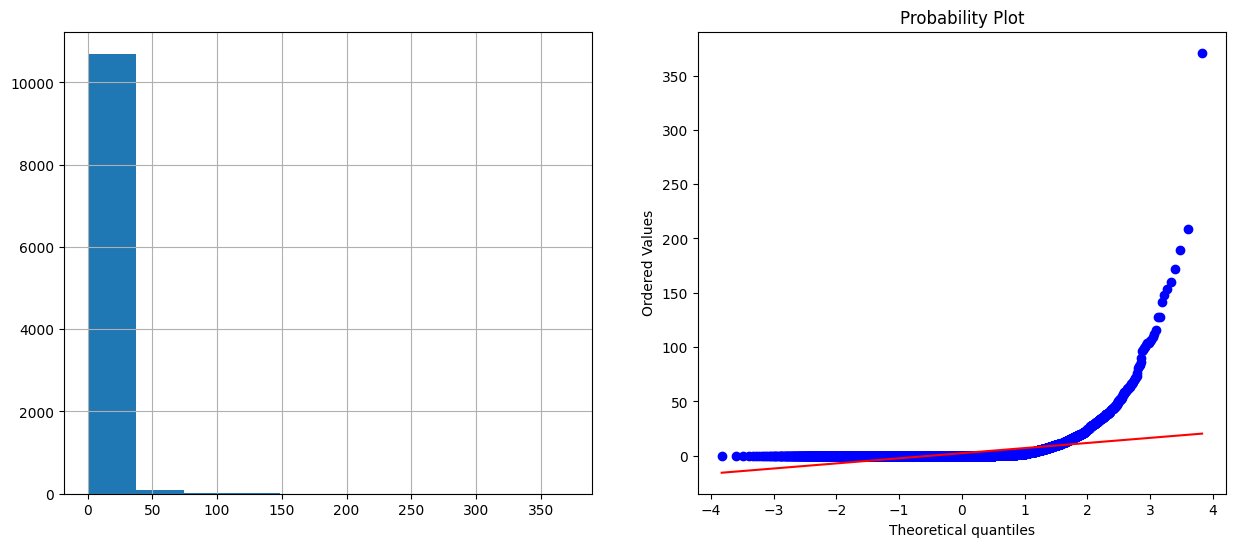

Evaporation


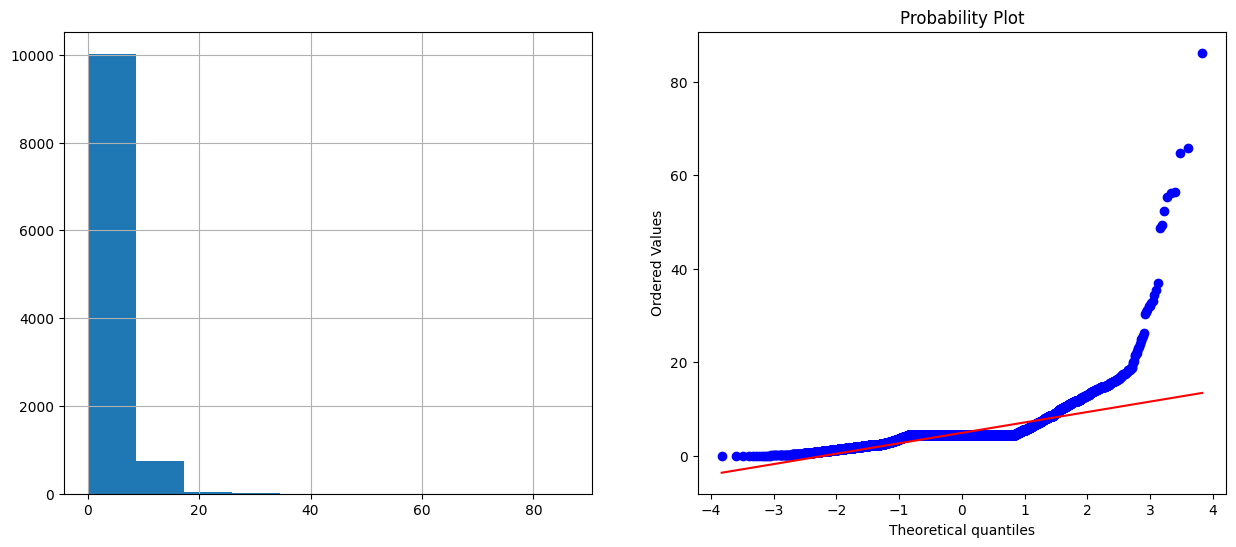

Sunshine


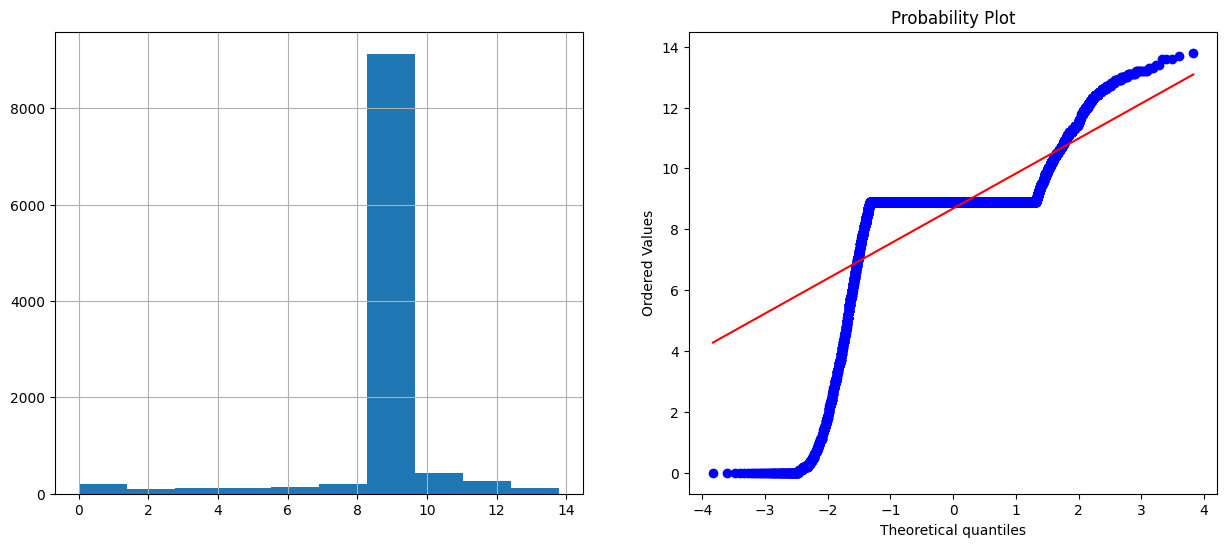

WindGustSpeed


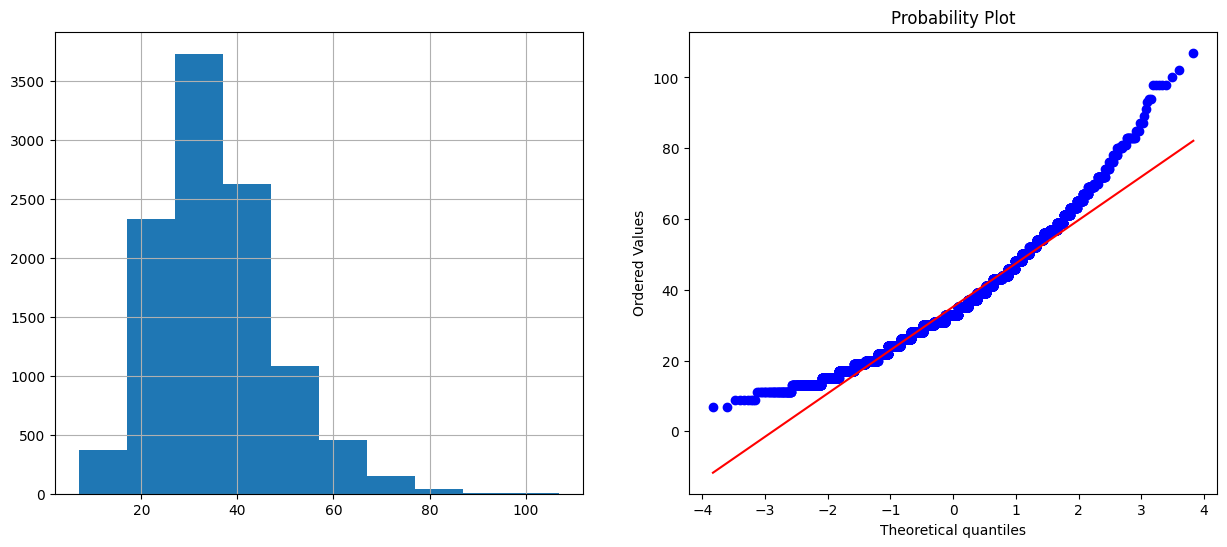

WindSpeed9am


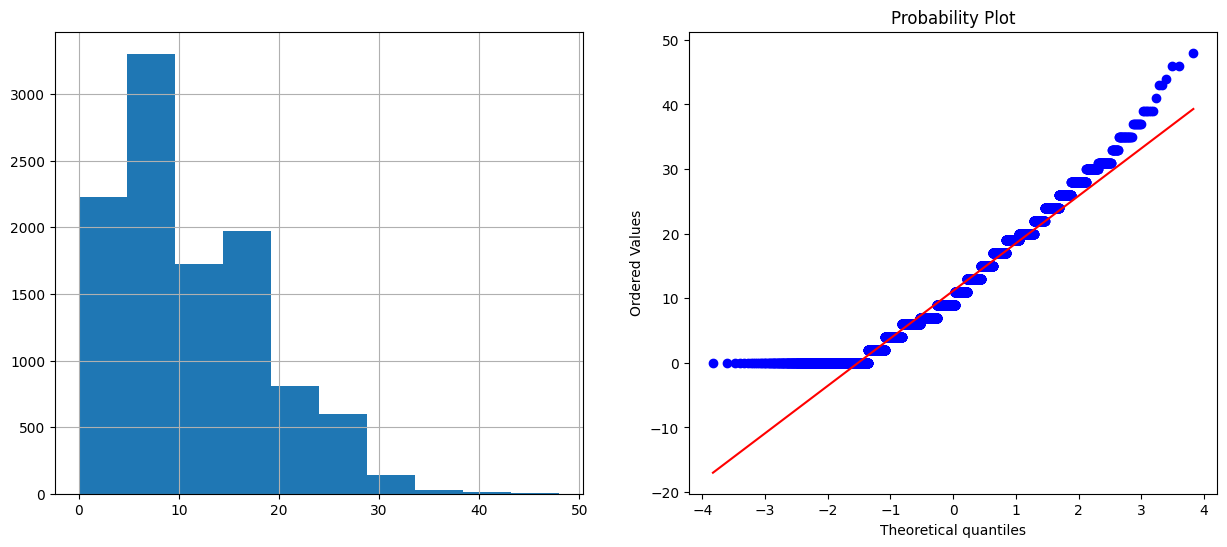

WindSpeed3pm


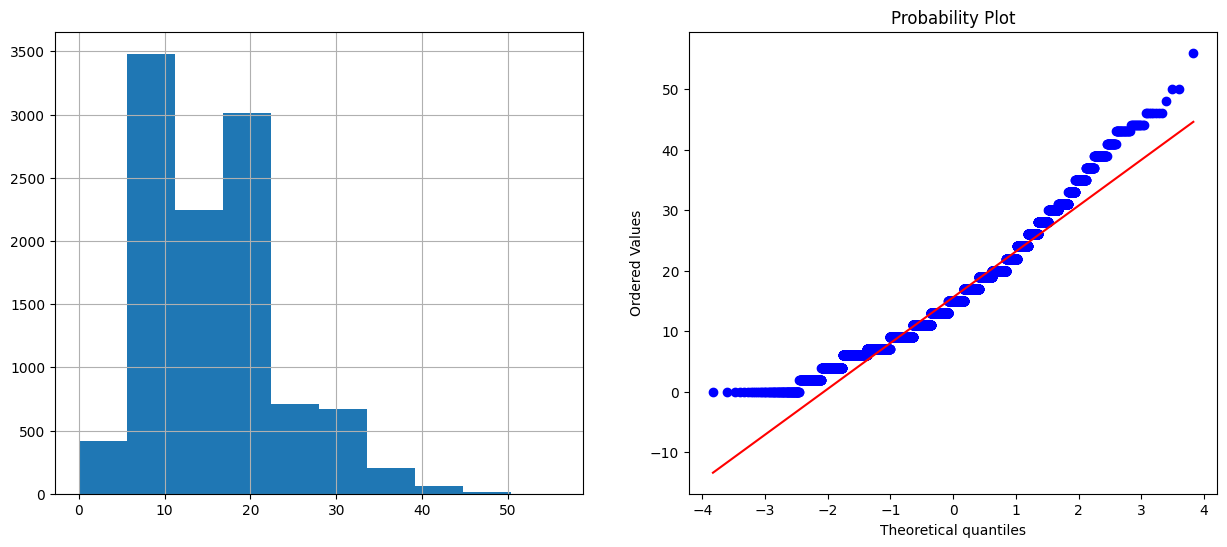

Humidity9am


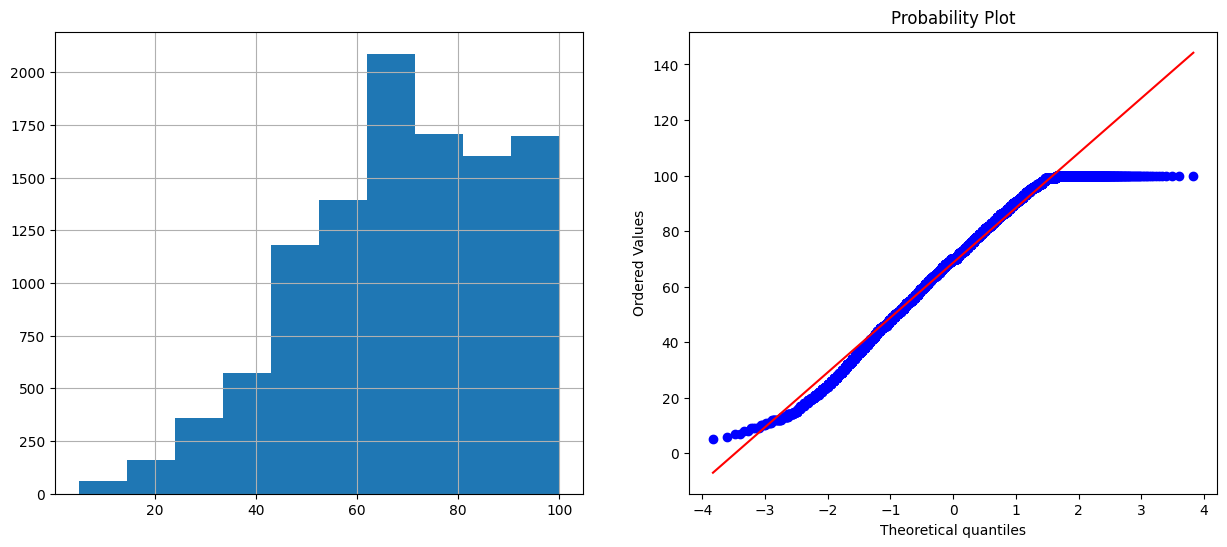

Humidity3pm


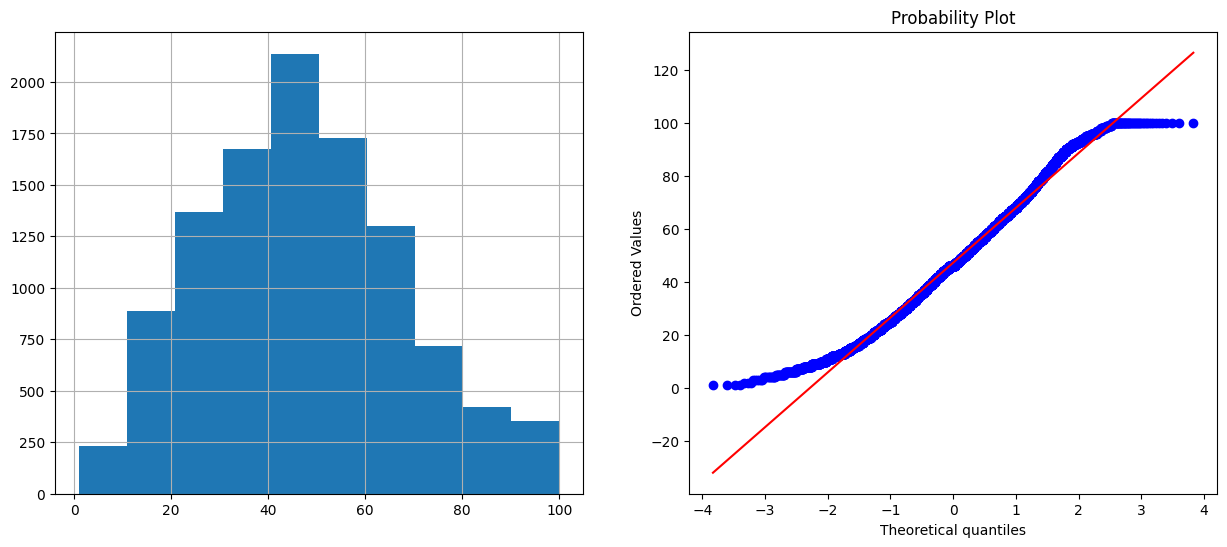

Pressure9am


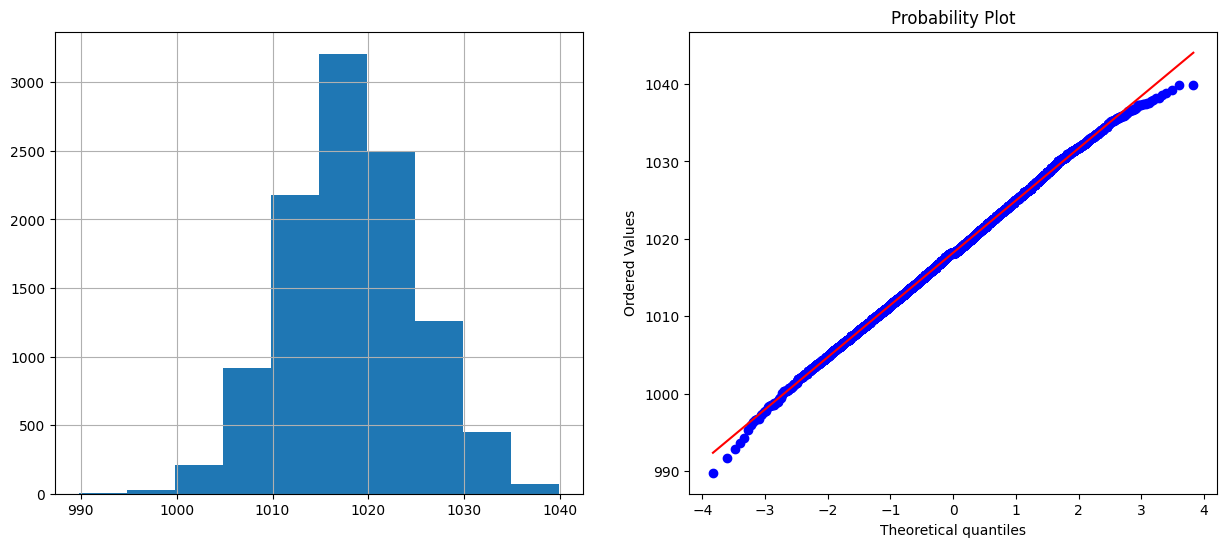

Pressure3pm


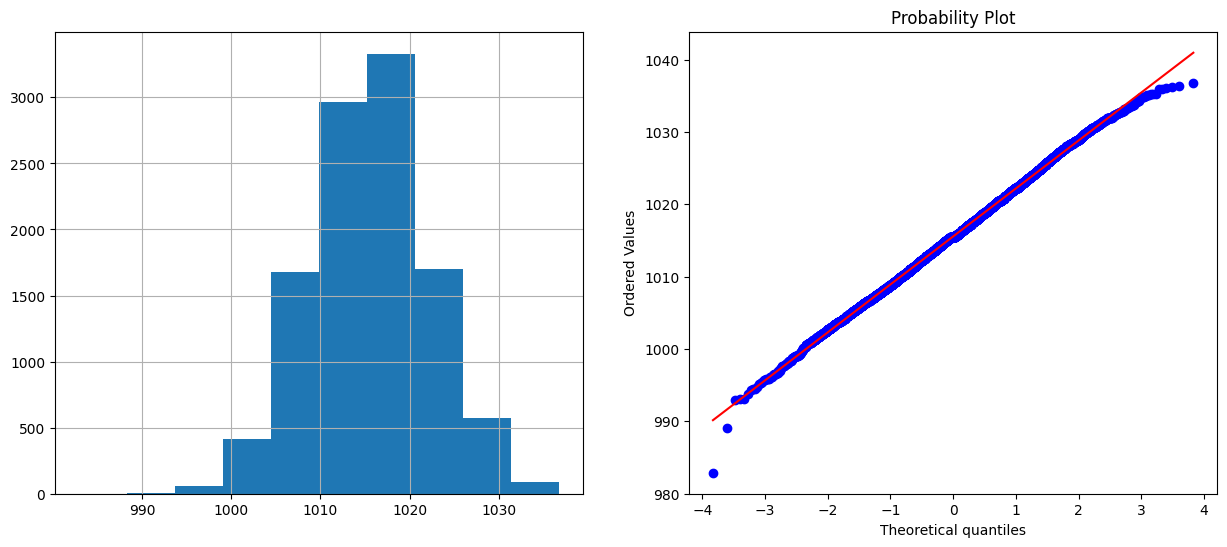

Temp9am


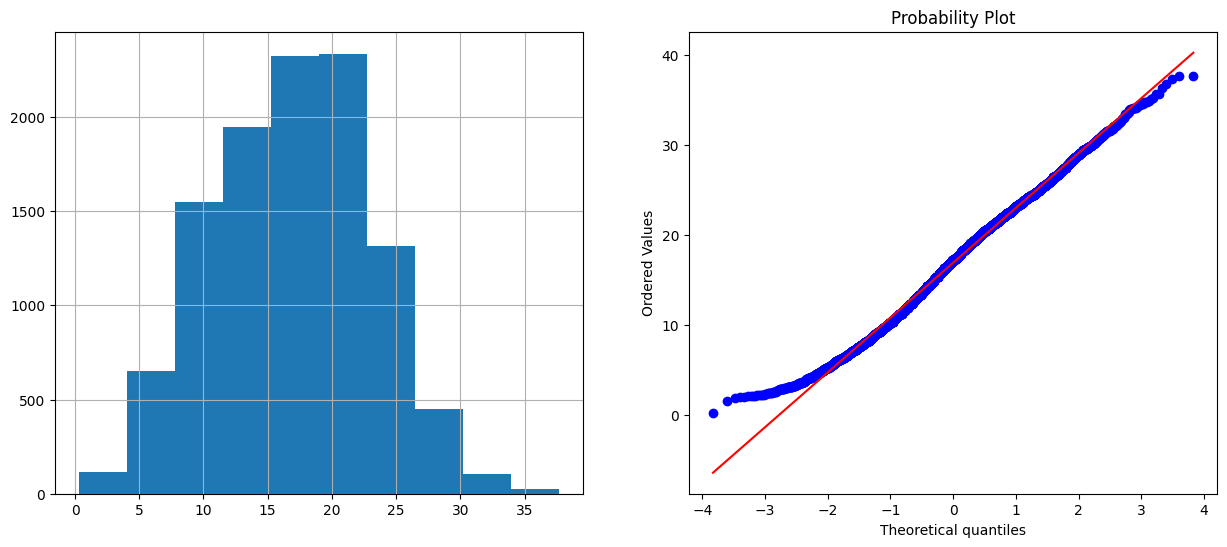

Temp3pm


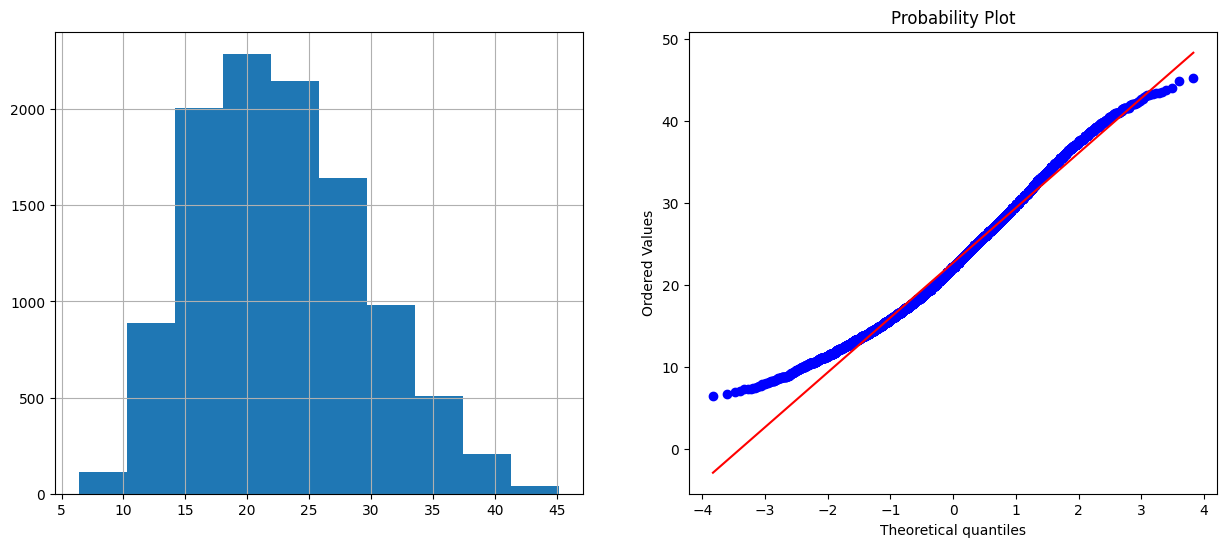

In [ ]:
for feature in continuous_feature:
    print(feature)
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stats.probplot(df[feature], dist="norm", plot=plt)
    plt.show()

In [ ]:
X = df.drop(["RainTomorrow"], axis = 1)
Y = df['RainTomorrow']

In [ ]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
10812    0
10813    0
10814    0
10815    1
10816    0
Name: RainTomorrow, Length: 10817, dtype: uint8

In [ ]:
#Building Machine Learning Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

from sklearn.metrics import make_scorer, accuracy_score,precision_score,recall_score,f1_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Let us now split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20,random_state=0)


print("X-Train:",X_train.shape)
print("X-Test:",X_test.shape)
print("Y-Train:",y_train.shape)
print("Y-Test:",y_test.shape)

X-Train: (8653, 24)
X-Test: (2164, 24)
Y-Train: (8653,)
Y-Test: (2164,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
x_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,year,month,day
10652,3,6.1,22.7,0.0,3.0,8.9,14,20.0,16,4,...,1018.5,1015.2,0.0,0.0,16.8,21.4,0,2013,8,11
1033,0,9.9,20.1,0.0,4.4,8.9,13,50.0,14,13,...,1015.2,1015.6,1.0,1.0,13.1,19.1,0,2011,10,30
5444,1,9.3,25.0,0.0,4.4,8.9,4,31.0,2,3,...,1018.2,1015.5,1.0,7.0,18.1,24.0,0,2015,10,30
4795,1,17.2,30.7,0.0,4.4,8.9,10,33.0,11,2,...,1010.1,1008.1,8.0,0.0,23.5,30.3,0,2014,1,19
10304,3,8.2,20.8,0.0,1.6,8.9,12,20.0,12,9,...,1015.1,1012.7,1.0,1.0,15.4,19.9,0,2012,6,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,0,20.5,32.5,0.0,4.4,8.9,13,35.0,13,13,...,1012.2,1011.7,8.0,5.0,24.5,30.4,0,2012,1,4
2514,0,14.5,30.6,0.0,4.4,8.9,4,24.0,5,10,...,1024.2,1019.6,8.0,3.0,20.5,28.1,0,2016,1,17
6637,2,7.6,11.3,3.2,1.6,8.9,15,61.0,15,15,...,1015.2,1015.4,8.0,7.0,7.9,10.8,1,2010,8,12
2575,0,19.8,21.1,10.4,4.4,8.9,13,74.0,3,13,...,996.0,1000.3,8.0,1.0,20.0,19.9,1,2016,3,18


In [ ]:
y_test

10550    0
7666     0
1400     0
8484     0
4607     0
        ..
4582     0
5043     0
6106     0
6961     0
10049    0
Name: RainTomorrow, Length: 2164, dtype: uint8

In [ ]:
#feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
#Logistic Regression:

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

log_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train)*100,2)

In [ ]:
acc_log

80.87

In [ ]:
#Random Forest:

In [ ]:
ranforest = RandomForestClassifier()
ranforest.fit(X_train, y_train)

ran_pred = ranforest.predict(X_test)

ranforest.score(X_train, y_train)

acc_ranforest = round(ranforest.score(X_train, y_train)*100,2)

In [ ]:
acc_ranforest

100.0

In [ ]:
# K Nearest Neighbor

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, y_train)*100,2)

In [ ]:
acc_knn

84.19

In [ ]:
#Gaussian Naive Bayes:

In [ ]:
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
gau_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train)*100,2)

In [ ]:
acc_gaussian

80.87

In [ ]:
#Decison Tree Classifier:

In [ ]:
from sklearn.tree import DecisionTreeClassifier


dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(X_train, y_train)

dt_pred = dt_classifier.predict(x_test)

acc_dt = round(dt_classifier.score(X_train, y_train) * 100, 2)

In [ ]:
acc_dt

100.0

In [ ]:
results = pd.DataFrame({
    'Model': [ 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes',
              ' Decision Tree' ],
    'Train_score': [ acc_knn, acc_log,
              acc_ranforest, acc_gaussian,
              acc_dt],
    'Accuracy_score':[round(accuracy_score(y_test,knn_pred) * 100),
                round(accuracy_score(y_test,log_pred) * 100),
                round(accuracy_score(y_test,ran_pred) * 100),
                round(accuracy_score(y_test,gau_pred)* 100),
                round(accuracy_score(y_test,dt_pred)* 100)]

})
result_df = results.sort_values(by='Accuracy_score', ascending=False)
result_df = result_df.set_index('Accuracy_score')
result_df

,Model,Train_score
Accuracy_score,,
79,Logistic Regression,80.87
79,Random Forest,100.00
79,Naive Bayes,80.87
75,Decision Tree,100.00
74,KNN,84.19


In [ ]:
results

,Model,Train_score,Accuracy_score
0,KNN,84.19,74
1,Logistic Regression,80.87,79
2,Random Forest,100.00,79
3,Naive Bayes,80.87,79
4,Decision Tree,100.00,75


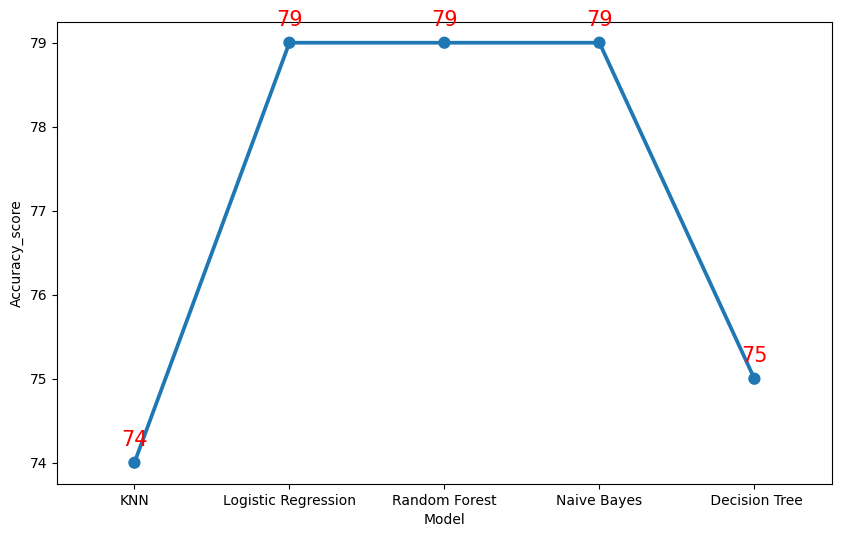

In [ ]:
plt.subplots(figsize=(10,6))
ax=sns.pointplot(x='Model',y="Accuracy_score",data=results)
labels = (results["Accuracy_score"])
# add result numbers on barchart
for i, v in enumerate(labels):
    ax.text(i, v+0.2, str(v), horizontalalignment = 'center', size = 15, color = 'red')